In [1]:
suppressPackageStartupMessages({
    library(Rsamtools)
    library(tidyverse)
    library(rtracklayer)
})

In [2]:
DATA_DIR = "/u/project/gandalm/shared/isoSeq/UCDavis"
RESULTS_DIR = "/u/project/gandalm/jops/ucdavis_cpgz_isoseq/results"

In [3]:
options(readr.num_threads = 8) # on h2 our machine has more cores than we are allowed to use

In [4]:
reads_table = read_csv("reads_flnc.csv", col_types = cols(reads_name = "f"))
reads_table

flnc_path,primer,read_count_Q30,read_count_Q20,read_count_Q10,read_count,cutoff,donor_id,region,sample_name,reads_name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220303_201517/F1/outputs/flnc-1.bam,bc1006_5p--bc1006_3p,712706,898802,1019085,1019085,Q10,209,VZ,209_1,209_1_VZ
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220303_201517/F1/outputs/flnc-2.bam,bc1008_5p--bc1008_3p,1357229,1728915,1972961,1972961,Q10,209,CP,209_1,209_1_CP
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220505_190448/F1/outputs/flnc-1.bam,bc1006_5p--bc1006_3p,718216,895373,895373,895373,Q20,209,VZ,209_2,209_2_VZ
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220505_190448/F1/outputs/flnc-2.bam,bc1008_5p--bc1008_3p,1428665,1799193,1799193,1799193,Q20,209,CP,209_2,209_2_CP
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220505_190448/G1/outputs/flnc-1.bam,bc1006_5p--bc1006_3p,647775,813346,813346,813346,Q20,209,VZ,209_3,209_3_VZ
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220505_190448/G1/outputs/flnc-2.bam,bc1008_5p--bc1008_3p,1293234,1638032,1638032,1638032,Q20,209,CP,209_3,209_3_CP
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220505_190448/H1/outputs/flnc-1.bam,bc1006_5p--bc1006_3p,684427,872050,872050,872050,Q20,209,VZ,209_4,209_4_VZ
PB707_2plex_Pool1_Human_IsoSeq/r64069_20220505_190448/H1/outputs/flnc-2.bam,bc1008_5p--bc1008_3p,1332133,1714296,1714296,1714296,Q20,209,CP,209_4,209_4_CP
PB707_2plex_Pool2_Human_IsoSeq/r64069_20220303_201517/G1/outputs/flnc-1.bam,bc1012_5p--bc1012_3p,1182708,1502194,1708324,1708324,Q10,334,VZ,334_1,334_1_VZ


## Import read annotations from TALON

We can concatenate the `talon_read_annot.tsv` files generated for each run.

In [5]:
talon_read_annot = read_tsv(
    list.files(
        file.path(RESULTS_DIR, "talon"),
        pattern = ".*(CP|VZ).*\\.talon_read_annot.tsv$",
        full.names = T
    ),
    na = c("None"),
    col_types = list(
        read_name = col_character(),
        dataset = col_factor(levels = levels(reads_table$reads_name)),
        genome_build = col_factor(),
        chrom = col_factor(),
        read_start = col_integer(),
        read_end = col_integer(),
        strand = col_factor(),
        n_exons = col_integer(),
        read_length = col_integer(),
        gene_ID = col_integer(),
        transcript_ID = col_integer(),
        annot_gene_id = col_character(),
        annot_transcript_id = col_character(),
        annot_gene_name = col_character(),
        annot_transcript_name = col_character(),
        gene_novelty = col_factor(),
        transcript_novelty = col_factor(),
        ISM_subtype = col_factor(include_na = F),
        fraction_As = col_double(),
        custom_label = col_character(),
        allelic_label = col_character(),
        start_support = col_character(),
        end_support = col_character()
    )
) %>%
#    slice_sample(n = 3000000) %>%
    mutate(
        gene_novelty = fct_infreq(gene_novelty),
        transcript_novelty = fct_infreq(transcript_novelty),
        ISM_subtype = ISM_subtype %>%
            na_if("None") %>%
            fct_drop() %>%
            fct_relevel("Suffix", "Prefix", "Both")
    ) %>%
    left_join(
        reads_table %>% select(reads_name, donor_id),
        by = c("dataset" = "reads_name")
    ) %>%
    dplyr::rename(donor_ID = "donor_id")
talon_read_annot

read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,annot_transcript_name,gene_novelty,transcript_novelty,ISM_subtype,fraction_As,custom_label,allelic_label,start_support,end_support,donor_ID
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
m64069_220513_100331/108332623/ccs,209_4_CP,GRCh37,GL000195.1,10804,9467,-,1,1338,62527,⋯,TALONT000229916,Intergenic,Intergenic,NA,0.75,NA,NA,NA,NA,209
m64069_220511_093959/19465626/ccs,209_2_CP,GRCh37,GL000195.1,32000,29244,-,1,2757,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.00,NA,NA,NA,NA,209
m64069_220310_023238/3932655/ccs,209_1_CP,GRCh37,GL000195.1,31785,29246,-,1,2540,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/47516090/ccs,209_1_CP,GRCh37,GL000195.1,31756,29246,-,1,2511,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/62654355/ccs,209_1_CP,GRCh37,GL000195.1,31818,29246,-,1,2573,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/79890292/ccs,209_1_CP,GRCh37,GL000195.1,31828,29246,-,1,2583,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/113967609/ccs,209_1_CP,GRCh37,GL000195.1,31780,29246,-,1,2535,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/133760186/ccs,209_1_CP,GRCh37,GL000195.1,31764,29246,-,1,2536,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/174656077/ccs,209_1_CP,GRCh37,GL000195.1,31797,29246,-,1,2552,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209


In [6]:
levels(talon_read_annot$dataset)

[1] "209_1_VZ" "209_1_CP" "209_2_VZ" "209_2_CP" "209_3_VZ" "209_3_CP"
 [7] "209_4_VZ" "209_4_CP" "334_1_VZ" "334_1_CP" "334_2_VZ" "334_2_CP"
[13] "334_3_VZ" "334_3_CP" "334_4_VZ" "334_4_CP" "336_1_VZ" "336_1_CP"
[19] "336_2_VZ" "336_2_CP" "336_3_VZ" "336_3_CP" "336_4_VZ" "336_4_CP"

In [7]:
levels(talon_read_annot$gene_novelty)

[1] "Known"      "Antisense"  "Intergenic"

In [8]:
levels(talon_read_annot$transcript_novelty)

[1] "Known"      "ISM"        "Genomic"    "NIC"        "NNC"       
[6] "Antisense"  "Intergenic"

In [9]:
levels(talon_read_annot$ISM_subtype)

[1] "Suffix" "Prefix" "Both"

In [10]:
read_annot_stats = function(talon_read_annot) {
    cat(sprintf(
        "# reads:\t%s\n# genes:\t%s\n# transcripts:\t%s\n",
        nrow(talon_read_annot),
        n_distinct(talon_read_annot$gene_ID),
        n_distinct(talon_read_annot$transcript_ID)
    ))
}
read_annot_stats(talon_read_annot)

# reads:	37331036
# genes:	174866
# transcripts:	3541220


## Filter reads based on predicted read accuracy

The Iso-Seq processing done by UC Davis was inconsistent in setting a read accuracy (BAM tag `rq`) threshold (see reads table above). PacBio [considers Q20 (`rq`>0.99) reads to be HiFi](https://ccs.how/faq/reads-bam.html), however Q10 (`rq`>0.9) is also acceptable. The most stringent threshold that UC Davis applied was Q20, so we filter all reads to Q20 for consistency.

For list of BAM tags generated by `ccs`, see [SMRT Tools Reference Guide](https://www.pacb.com/wp-content/uploads/SMRT_Tools_Reference_Guide_v10.2.pdf), page 14.

In [11]:
get_read_quals = function(flnc_path, ...) {
    message(paste("Scanning", flnc_path))
    bam_file = BamFile(file.path(DATA_DIR, flnc_path))
    params = ScanBamParam(what = c("qname"), tag = c("rq")) # can add other interesting tags here
    bam_tags = scanBam(bam_file, param = params)
    bind_cols(tibble(qname = bam_tags[[1]]$qname), tibble(!!!bam_tags[[1]]$tag))
}

if (!file.exists("read_quals.csv.gz")) {
    read_quals = reads_table %>%
    #    head(n = 2) %>%
        mutate(read_quals = map(flnc_path, get_read_quals)) %>%
        select(reads_name, read_quals) %>%
        mutate(reads_name = as_factor(reads_name)) %>%
        unnest(read_quals) %>%
        dplyr::rename(dataset = reads_name, read_name = qname)
    read_quals %>% write_csv("read_quals.csv.gz")
} else {
    read_quals = read_csv("read_quals.csv.gz", col_types = "fcd")
}
read_quals

dataset,read_name,rq
<fct>,<chr>,<dbl>
209_1_VZ,m64069_220310_023238/3/ccs,1.0000000
209_1_VZ,m64069_220310_023238/20/ccs,0.9998962
209_1_VZ,m64069_220310_023238/24/ccs,0.9999990
209_1_VZ,m64069_220310_023238/26/ccs,0.9999968
209_1_VZ,m64069_220310_023238/33/ccs,0.9709887
209_1_VZ,m64069_220310_023238/36/ccs,0.9999830
209_1_VZ,m64069_220310_023238/46/ccs,0.9924731
209_1_VZ,m64069_220310_023238/79/ccs,0.9999995
209_1_VZ,m64069_220310_023238/97/ccs,0.9999970


Number of hifi reads -- differs ever so slightly from the number in `/u/project/gandalm/jops/ucdavis_cpvz_isoseq/merged_bam/CP_VZ.hifi.bam` (used for QC) -- 33652097 -- because of rounding (see `Read_sum_stats.ipynb`).

In [12]:
read_quals %>% filter(rq >= 0.99) %>% summarize(n = n())

n
<int>
33651963


In [13]:
talon_read_annot = talon_read_annot %>%
     semi_join(
         read_quals %>% filter(rq >= 0.99),
         by = c("read_name", "dataset")
     )
talon_read_annot

read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,annot_transcript_name,gene_novelty,transcript_novelty,ISM_subtype,fraction_As,custom_label,allelic_label,start_support,end_support,donor_ID
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
m64069_220513_100331/108332623/ccs,209_4_CP,GRCh37,GL000195.1,10804,9467,-,1,1338,62527,⋯,TALONT000229916,Intergenic,Intergenic,NA,0.75,NA,NA,NA,NA,209
m64069_220511_093959/19465626/ccs,209_2_CP,GRCh37,GL000195.1,32000,29244,-,1,2757,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.00,NA,NA,NA,NA,209
m64069_220310_023238/47516090/ccs,209_1_CP,GRCh37,GL000195.1,31756,29246,-,1,2511,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/62654355/ccs,209_1_CP,GRCh37,GL000195.1,31818,29246,-,1,2573,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/79890292/ccs,209_1_CP,GRCh37,GL000195.1,31828,29246,-,1,2583,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/113967609/ccs,209_1_CP,GRCh37,GL000195.1,31780,29246,-,1,2535,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/174656077/ccs,209_1_CP,GRCh37,GL000195.1,31797,29246,-,1,2552,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220310_023238/176358972/ccs,209_1_CP,GRCh37,GL000195.1,31784,29246,-,1,2539,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209
m64069_220511_093959/1507686/ccs,209_2_CP,GRCh37,GL000195.1,31663,29246,-,1,2418,62528,⋯,TALONT000229917,Intergenic,Intergenic,NA,0.05,NA,NA,NA,NA,209


In [14]:
read_annot_stats(talon_read_annot)

# reads:	33031325
# genes:	169043
# transcripts:	2907966


## Filter transcripts without external support

### Method 1 (Strictly follow TALON schema)

Novel transcripts must be supported by at least $n$ reads without evidence of internal priming in each of $k$ or more donors. Novel transcripts cannot be monoexonic.

$n = 5$, $k = 2$, and internal priming is indicated by $\text{fraction  As} > 0.5$.

In [14]:
talon_read_annot_filtered = talon_read_annot %>%
    left_join(
        (.) %>%
            group_by(transcript_ID, donor_ID) %>%
            summarize(n_reads = sum(fraction_As <= 0.5)) %>%
            summarize(n_donors = sum(n_reads >= 5))
    ) %>%
    filter(transcript_novelty == "Known" | (n_exons > 1 & n_donors >= 2))
talon_read_annot_filtered

`summarise()` has grouped output by 'transcript_ID'. You can override using the `.groups` argument.
Joining, by = "transcript_ID"


read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,gene_novelty,transcript_novelty,ISM_subtype,fraction_As,custom_label,allelic_label,start_support,end_support,donor_ID,n_donors
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
m64069_220511_093959/125894842/ccs,209_2_CP,GRCh37,GL000195.1,86724,42101,-,3,3195,62532,⋯,Antisense,NIC,NA,0.55,NA,NA,NA,NA,209,3
m64069_220512_095146/71108423/ccs,209_3_CP,GRCh37,GL000195.1,86719,42108,-,3,3183,62532,⋯,Antisense,NIC,NA,0.45,NA,NA,NA,NA,209,3
m64069_220310_023238/15140142/ccs,209_1_CP,GRCh37,GL000195.1,86715,42535,-,3,2752,62532,⋯,Antisense,NIC,NA,0.40,NA,NA,NA,NA,209,3
m64069_220512_095146/32703227/ccs,209_3_CP,GRCh37,GL000195.1,86688,42535,-,3,4603,62532,⋯,Antisense,NNC,NA,0.40,NA,NA,NA,NA,209,3
m64069_220512_095146/36176607/ccs,209_3_CP,GRCh37,GL000195.1,86724,42535,-,3,2761,62532,⋯,Antisense,NIC,NA,0.40,NA,NA,NA,NA,209,3
m64069_220513_100331/60098863/ccs,209_4_CP,GRCh37,GL000195.1,86717,42536,-,4,2813,62532,⋯,Antisense,NNC,NA,0.40,NA,NA,NA,NA,209,3
m64069_220511_093959/39059567/ccs,209_2_CP,GRCh37,GL000195.1,86658,42639,-,3,2591,62532,⋯,Antisense,NIC,NA,0.80,NA,NA,NA,NA,209,3
m64069_220513_100331/159450544/ccs,209_4_CP,GRCh37,GL000195.1,86646,42639,-,4,2639,62532,⋯,Antisense,NNC,NA,0.80,NA,NA,NA,NA,209,3
m64069_220513_100331/60621330/ccs,209_4_CP,GRCh37,GL000195.1,86687,42640,-,4,4669,62532,⋯,Antisense,NNC,NA,0.80,NA,NA,NA,NA,209,2


In [15]:
read_annot_stats(talon_read_annot_filtered)

# reads:	21820310
# genes:	23912
# transcripts:	124125


### Method 2 (Similar to scIsoSeq)

Novel transcripts must be supported by at least $n$ reads without evidence of internal priming across all donors, and supporting reads must be present in $k$ or more donors. Novel transcripts cannot be monoexonic.

$n = 5$, $k = 2$, and internal priming is indicated by $\text{fraction  As} > 0.5$.

In [ ]:
talon_read_annot_filtered = talon_read_annot %>%
    left_join(
        (.) %>%
            filter(fraction_As <= 0.5) %>%
            group_by(transcript_ID) %>%
            summarize(n_reads = n(), n_donors = n_distinct(donor_ID))
    ) %>%
    filter(transcript_novelty == "Known" | (n_exons > 1 & n_reads >= 5 & n_donors >= 2))
talon_read_annot_filtered

In [ ]:
read_annot_stats(talon_read_annot_filtered)

### Create sevaral GTFs with different fraction A thresholds

Following method 2 above.

In [30]:
filter_reads_by_transcript = function(x, f = 0.5, n = 5, k = 2, allow_monoexonic = F) {
    message(str_glue("Filtering transcripts with f = {f}, n = {n}, k = {k}, allow_monoexonic = {allow_monoexonic}"))
    x %>%
        left_join(
            (.) %>%
                filter(fraction_As <= f) %>%
                group_by(transcript_ID) %>%
                summarize(n_reads = n(), n_donors = n_distinct(donor_ID))
        ) %>%
        filter(transcript_novelty == "Known" | ((allow_monoexonic | n_exons > 1) & n_reads >= n & n_donors >= k))
}

In [31]:
c(0.5, 0.6, 0.75) %>%
    walk(function(f) {
        talon_read_annot_filtered = filter_reads_by_transcript(talon_read_annot, f)
        talon_read_annot_filtered %>%
            group_by(gene_ID, transcript_ID) %>%
            summarize() %>%
            write_csv(paste0("talon_whitelist_", f, ".txt"), col_names = F)
        read_annot_stats(talon_read_annot_filtered)
    })

Filtering transcripts with f = 0.5, n = 5, k = 2, allow_monoexonic = FALSE
Joining, by = "transcript_ID"
`summarise()` has grouped output by 'gene_ID'. You can override using the `.groups` argument.


# reads:	23036797
# genes:	24628
# transcripts:	221270


Filtering transcripts with f = 0.6, n = 5, k = 2, allow_monoexonic = FALSE
Joining, by = "transcript_ID"
`summarise()` has grouped output by 'gene_ID'. You can override using the `.groups` argument.


# reads:	23247936
# genes:	24666
# transcripts:	227752


Filtering transcripts with f = 0.75, n = 5, k = 2, allow_monoexonic = FALSE
Joining, by = "transcript_ID"
`summarise()` has grouped output by 'gene_ID'. You can override using the `.groups` argument.


# reads:	23972322
# genes:	24966
# transcripts:	265002


```
conda activate .snakemake/conda/59fab4b877169aaff69a189e3f1daa5b
talon_create_GTF \
    --db results/talon/talon.db \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --whitelist talon_whitelist_0.5.txt \
    --o cp_vz_0.5

talon_create_GTF \
    --db results/talon/talon.db \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --whitelist talon_whitelist_0.6.txt \
    --o cp_vz_0.6

talon_create_GTF \
    --db results/talon/talon.db \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --whitelist talon_whitelist_0.75.txt \
    --o cp_vz_0.75
```

## External support based on scripts from the TALON paper

https://github.com/mortazavilab/TALON-paper-2020/tree/master/Figure_4

```
conda activate .snakemake/conda/1d7db5409a5dfc6ab8b50ac9bc58046f

talon_create_GTF \
    --db results/talon/talon.db \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --observed \
    --o cp_vz_unfiltered
```

### RNA-PET (not to be used)

The TALON paper uses a dataset from ENCODE, more details here: https://www.encodeproject.org/experiments/ENCSR000BCA/.

```
cd TALON-paper-2020/RNA-PET_data
./download_RNA-PET.sh
```

No need to liftover, since we are using GRCh37 at the moment.

```
cd TALON-paper-2020/Figure_4
mkdir -p RNA-PET
python run_RNA-PET_analysis.py \
    --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
    --rnapet ../RNA-PET_data/data/GM12878.bed \
    --maxdist 100 \
    --o RNA-PET/cp_vz
```

### CAGE

The TALON paper uses FANTOM5. It may be better to use refTSS, like SQANTI3 does.

```
cd TALON-paper-2020/CAGE_data
./download_FANTOM5_CAGE.sh
```

```
cd TALON-paper-2020/Figure_4
mkdir -p CAGE
python run_CAGE_analysis.py \
        --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
        --cage ../CAGE_data/FANTOM5/hg19_CAGE.bed \
        --maxdist 100 \
        --o CAGE/cp_vz
```

### Computational PAS

```
cd TALON-paper-2020/Figure_4
mkdir -p PAS-comp
python run_computational_PAS_analysis.py \
        --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
        --genome /u/project/gandalm/jops/isoseq/ref/GRCh37.primary_assembly.genome.fa \
        --maxdist 100 \
        --o PAS-comp/cp_vz
```

### Other thresholds

```
python run_CAGE_analysis.py \
        --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
        --cage ../CAGE_data/FANTOM5/hg19_CAGE.bed \
        --maxdist 250 \
        --o CAGE/cp_vz_250

python run_CAGE_analysis.py \
        --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
        --cage ../CAGE_data/FANTOM5/hg19_CAGE.bed \
        --maxdist 500 \
        --o CAGE/cp_vz_500
        
mv cp_vz_CAGE_results.csv cp_vz_CAGE_results.100.csv
mv cp_vz_250_CAGE_results.csv cp_vz_CAGE_results.250.csv
mv cp_vz_500_CAGE_results.csv cp_vz_CAGE_results.500.csv

python run_computational_PAS_analysis.py \
        --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
        --genome /u/project/gandalm/jops/isoseq/ref/GRCh37.primary_assembly.genome.fa \
        --maxdist 35 \
        --o PAS-comp/cp_vz_35

python run_computational_PAS_analysis.py \
        --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
        --genome /u/project/gandalm/jops/isoseq/ref/GRCh37.primary_assembly.genome.fa \
        --maxdist 50 \
        --o PAS-comp/cp_vz_50

mv cp_vz_polyA_motif.csv cp_vz_polyA_motif.100.csv
mv cp_vz_35_polyA_motif.csv cp_vz_polyA_motif.35.csv
mv cp_vz_50_polyA_motif.csv cp_vz_polyA_motif.50.csv
```

### Fetal CAGE

```
cd TALON-paper-2020/CAGE_data
cp /u/project/gandalm/jops/isoseq/final/resources/cage_sum_simplified.bed .
```

```
cd TALON-paper-2020/Figure_4
mkdir -p CAGE
python run_CAGE_analysis.py \
        --gtf ../../cp_vz_unfiltered_talon_observedOnly.gtf \
        --cage ../CAGE_data/cage_sum_simplified.bed \
        --maxdist 100 \
        --o CAGE/cp_vz
```


In [15]:
cage_support = c(100, 250, 500) %>%
    map_dfr(
        ~ read_csv(
            str_glue("TALON-paper-2020/Figure_4/CAGE/cp_vz_CAGE_results.{.x}.csv"),
            col_types = cols()
        ) %>% mutate(dist = .x)
    ) %>%
    mutate(CAGE_support = CAGE_support == "yes") %>%
    pivot_wider(
        names_from = dist,
        values_from = CAGE_support,
        names_prefix = "CAGE_support_"
    )
cage_support

transcript_ID,CAGE_support_100,CAGE_support_250,CAGE_support_500
<chr>,<lgl>,<lgl>,<lgl>
TALONT000233107,FALSE,FALSE,FALSE
TALONT000858865,FALSE,FALSE,FALSE
TALONT000233109,FALSE,FALSE,FALSE
TALONT000233119,FALSE,FALSE,FALSE
TALONT000233121,FALSE,FALSE,FALSE
TALONT000233123,FALSE,FALSE,FALSE
TALONT000233124,FALSE,FALSE,FALSE
TALONT000233126,FALSE,FALSE,FALSE
TALONT000233127,FALSE,FALSE,FALSE


In [16]:
polya_motif_support = c(35, 50, 100) %>%
    map_dfr(
        ~ read_csv(
            str_glue("TALON-paper-2020/Figure_4/PAS-comp/cp_vz_polyA_motif.{.x}.csv"),
            col_types = cols()
        ) %>% mutate(dist = .x)
    ) %>%
    mutate(PAS_motif_support = PAS_motif_support == "yes") %>%
    pivot_wider(
        names_from = dist,
        values_from = PAS_motif_support,
        names_prefix = "PAS_motif_support_"
    )
polya_motif_support

transcript_ID,PAS_motif_support_35,PAS_motif_support_50,PAS_motif_support_100
<chr>,<lgl>,<lgl>,<lgl>
TALONT000233107,TRUE,TRUE,TRUE
TALONT000858865,FALSE,FALSE,FALSE
TALONT000233109,TRUE,TRUE,TRUE
TALONT000233119,TRUE,TRUE,TRUE
TALONT000233121,TRUE,TRUE,TRUE
TALONT000233123,TRUE,TRUE,TRUE
TALONT000233124,TRUE,TRUE,TRUE
TALONT000233126,TRUE,TRUE,TRUE
TALONT000233127,TRUE,TRUE,TRUE


## External support based on SQANTI3

In [17]:
sqanti_support = read_tsv(file.path(RESULTS_DIR, "cp_vz_unfiltered_talon_observedOnly.SQANTI3", "cp_vz_unfiltered_talon_observedOnly_classification.txt"))
sqanti_support

Rows: 3541220 Columns: 48
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (14): isoform, chrom, strand, structural_category, associated_gene, asso...
dbl (21): length, exons, ref_length, ref_exons, diff_to_TSS, diff_to_TTS, di...
lgl (13): RTS_stage, FL, n_indels, n_indels_junc, bite, iso_exp, gene_exp, r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,⋯,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<chr>,<lgl>
ENST00000003583.12_2,chr1,-,2544,8,full-splice_match,ENSG00000001460.18_6,ENST00000003583.12_2,2544,8,⋯,TATTGAGCTTTTGGGTACCC,30,TRUE,-23,TRUE,ATTAAA,-16,TRUE,MSHKVKENSSHQPTLPSVPRTFLRRRPIMSVAADNLGGGSTTLAWHPSRTAAIAFVLSWRHCSLETSPQPHRLQWLPEQKGGVDRAPWLLPHAPIQAAFRHDSLPQTEGTPEAQTSRRISPP,NA
ENST00000003912.7_2,chr1,+,5481,13,full-splice_match,ENSG00000001461.17_3,ENST00000003912.7_2,5481,13,⋯,CAGCTGAGTTCGTGTCTTAT,4,TRUE,30,TRUE,ATTAAA,-15,TRUE,MLLGELGVFASYAFAPLSLIVPLSAVSVIASAIIGIIFIKEKWKPKDFLRRYVLSFVGCGLAVVGTYLLVTFAPNSHEKMTGENVTRHLVSWPFLLYMLVEIILFCLLLYFYKEKNANNIVVILLLVALLGSMTVVTVKAVAGMLVLSIQGNLQLDYPIFYVMFVCMVATAVYQAAFLSQASQMYDSSLIASVGYILSTTIAITAGAIFYLDFIGEDVLHICMFALGCLIAFLGVFLITRNRKKPIPFEPYISMDAMPGMQNMHDKGMTVQPELKASFSYGALENNDNISEIYAPATLPVMQEEHGSRSASGVPYRVLEHTKKE,NA
ENST00000008440.9_1,chr1,+,1667,3,full-splice_match,ENSG00000010072.16_4,ENST00000008440.9_1,1667,3,⋯,AGAAAACTGTACATTAGTTT,-17,TRUE,23,TRUE,AATAAA,-20,TRUE,MDDDLMLALRLQEEWNLQEAERDHAQESLSLVDASWELVDPTPDLQALFVQFNDQFFWGQLEAVEVKWSVRMTLCAGICSYEGKGGMCSIRLSEPLLKLRPRKDLVEVYHTFHDEVDEYRRHWWRCNGPCQHRPPYYGYVKRATNREPSAHDYWWAEHQKTCGGTYIKIKEPENYSKKGKGKAKLGKEPVLAAENKGTFVYILLIFM,NA
ENST00000009105.5_1,chr1,+,2612,13,full-splice_match,ENSG00000008118.10_4,ENST00000009105.5_1,2612,13,⋯,ATGAGGCTTCATTTGGTTCT,1,TRUE,22,TRUE,AATAAA,-19,TRUE,MGRKEEDDCSSWKKQTTNIRKTFIFMEVLGSGAFSEVFLVKQRLTGKLFALKCIKKSPAFRDSSLENEIAVLKKIKHENIVTLEDIYESTTHYYLVMQLVSGGELFDRILERGVYTEKDASLVIQQVLSAVKYLHENGIVHRDLKPENLLYLTPEENSKIMITDFGLSKMEQNGIMSTACGTPGYVAPEVLAQKPYSKAVDCWSIGVITYILLCGYPPFYEETESKLFEKIKEGYYEFESPFWDDISESAKDFICHLLEKDPNERYTCEKALSHPWIDGNTALHRDIYPSVSLQIQKNFAKSKWRQAFNAAAVVHHMRKLHMNLHSPGVRPEVENRPPETQASETSRPSSPEITITEAPVLDHSVALPALTQLPCQHGRRPTAPGGRSLNCLVNGSLHISSSLVPMHQGSLAAGPCGCCSSCLNIGSKGKSSYCSEPTLLKKANKKQNFKSEVMVPVKASGSSHCRAGQTGVCLIM,NA
ENST00000054650.8_1,chr1,+,1366,6,full-splice_match,ENSG00000041988.15_5,ENST00000054650.8_1,1366,6,⋯,TGTCGCTCCCATCATCATTT,-2,TRUE,29,TRUE,AATAAA,-17,TRUE,MPKSCAARQCCNRYSSRRKQLTFHRFPFSRPELLKEWVLNIGRGNFKPKQHTVICSEHFRPECFSAFGNRKNLKHNAVPTVFAFQDPTQQVRENTDPASERGNASSSQKEKVLPEAGAGEDSPGRNMDTALEELQLPPNAEGHVKQVSPRRPQATEAVGRPTGPAGLRRTPNKQPSDHSYALLDLDSLKKKLFLTLKENEKLRKRLQAQRLVMRRMSSRLRACKGHQGLQARLGPEQQS,NA
ENST00000054666.11_2,chr1,+,2178,5,full-splice_match,ENSG00000049245.13_4,ENST00000054666.11_2,2178,5,⋯,TTGTGGCACCTGTGCTCCTT,-13,TRUE,32,TRUE,AATAAA,-17,TRUE,MSTGPTAATGSNRRLQQTQNQVDEVVDIMRVNVDKVLERDQKLSELDDRADALQAGASQFETSAAKLKRKYWWKNCKMWAIGITVLVIFIIIIIVWVVSS,NA
ENST00000060969.5_4,chr1,-,2190,5,full-splice_match,ENSG00000052723.11_4,ENST00000060969.5_4,2190,5,⋯,CTTCCAAGTGTGAGCATTTT,-14,TRUE,-15,TRUE,AAAACA,-1,TRUE,MSCTIEKILTDAKTLLERLREHDAAAESLVDQSAALHRRVAAMREAGTALPDQYQEDASDMKDMSKYKPHILLSQENTQIRDLQQENRELWISLEEHQDALELIMSKYRKQMLQLMVAKKAVDAEPVLKAHQSHSAEIESQIDRICEMGEVMRKAVQVDDDQFCKIQEKLAQLELENKELRELLSISSESLQARKENSMDTASQAIK,NA
ENST00000072644.7_4,chr1,-,1821,11,full-splice_match,ENSG00000058799.15_4,ENST00000072644.7_4,1821,11,⋯,TGTCTGTGTCTGCATTTTGT,-8,TRUE,-32,TRUE,AATAAA,-13,TRUE,MAAVDDLQFEEFGNAATSLTANPDATTVNIEDPGETPKHQPGSPRGSGREEDDELLGNDDSDKTELLAGQKKSSPFWTFEYYQTFFDVDTYQVFDRIKGSLLPIPGKNFVRLYIRSNPDLYGPFWICATLVFAIAISGNLSNFLIHLGEKTYHYVPEFRKVSIAATIIYAYAWLVPLALWGFLMWRNSKVMNIVSYSFLEIVCVYGYSLFIYIPTAILWIIPQKAVRWILVMIALGISGSLLAMTFWPAVREDNRRVALATIVTIVLLHMLLSVGCLAYFFDAPEMDHLPTTTATPNQTVAAAKSS,NA
ENST00000078527.8_1,chr1,+,2367,4,full-splice_match,ENSG00000060642.10_6,ENST00000078527.8_1,2367,4,⋯,TGCAATGAATTGCCTTTTTA,17,TRUE,135,TRUE,ATTAAA,-18,TRUE,MWPQDPSRKEVLRFAVSCRILTLMLQALFNAIIPDHHAEAFSPPRLAPSGFVDQLVEGLLGGLSHWDAEHFLFIAEHGYLYEHNFAFFPGFPLALLVGTELLRPLRGLLSLRSCLLISVASLNFLFFMLAAVALHDLGCLVLHCPHQSFYAALLFCLSPANVFLAAGYSEALFALLTFSAMGQLERGRV

In [18]:
colnames(sqanti_support)

[1] "isoform"               "chrom"                 "strand"               
 [4] "length"                "exons"                 "structural_category"  
 [7] "associated_gene"       "associated_transcript" "ref_length"           
[10] "ref_exons"             "diff_to_TSS"           "diff_to_TTS"          
[13] "diff_to_gene_TSS"      "diff_to_gene_TTS"      "subcategory"          
[16] "RTS_stage"             "all_canonical"         "min_sample_cov"       
[19] "min_cov"               "min_cov_pos"           "sd_cov"               
[22] "FL"                    "n_indels"              "n_indels_junc"        
[25] "bite"                  "iso_exp"               "gene_exp"             
[28] "ratio_exp"             "FSM_class"             "coding"               
[31] "ORF_length"            "CDS_length"            "CDS_start"            
[34] "CDS_end"               "CDS_genomic_start"     "CDS_genomic_end"      
[37] "predicted_NMD"         "perc_A_downstream_TTS" "seq_A_downstream_TTS" 
[40] "dist_to_CAGE_peak"     "within_CAGE_peak"      "dist_to_polyA_site"   
[43] "within_polyA_site"     "polyA_motif"           "polyA_dist"           
[46] "polyA_motif_found"     "ORF_seq"               "ratio_TSS"

## External support merged

TALON paper distances:
* CAGE peak: 100
* polyA motif: 35
* (fraction A: .5)

TALON paper sources:
* CAGE peak: FANTOM5

SQANTI distances:
* CAGE peak: 10000
* polyA motif: 50
* polyA site: 100
* (fraction A: .6)

SQANTI sources:
* CAGE peak: refTSS v3.3
* PolyASite 2.0 Atlas

In [19]:
support_merged = sqanti_support %>%
    select(isoform, dist_to_CAGE_peak, within_CAGE_peak, dist_to_polyA_site,
           within_polyA_site, polyA_motif, polyA_dist, polyA_motif_found) %>%
    rename(
        transcript_ID = "isoform",
        dist_to_polyA_motif = "polyA_dist"
    ) %>%
    left_join(cage_support) %>%
    left_join(polya_motif_support)
support_merged

Joining, by = "transcript_ID"
Joining, by = "transcript_ID"


transcript_ID,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,dist_to_polyA_motif,polyA_motif_found,CAGE_support_100,CAGE_support_250,CAGE_support_500,PAS_motif_support_35,PAS_motif_support_50,PAS_motif_support_100
<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ENST00000003583.12_2,30,TRUE,-23,TRUE,ATTAAA,-16,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000003912.7_2,4,TRUE,30,TRUE,ATTAAA,-15,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000008440.9_1,-17,TRUE,23,TRUE,AATAAA,-20,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000009105.5_1,1,TRUE,22,TRUE,AATAAA,-19,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000054650.8_1,-2,TRUE,29,TRUE,AATAAA,-17,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000054666.11_2,-13,TRUE,32,TRUE,AATAAA,-17,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000060969.5_4,-14,TRUE,-15,TRUE,AAAACA,-1,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE
ENST00000072644.7_4,-8,TRUE,-32,TRUE,AATAAA,-13,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000078527.8_1,17,TRUE,135,TRUE,ATTAAA,-18,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


## Long read DB

```
mkdir cmp13
cd cmp13
ln -s ../cp_vz_unfiltered_talon_observedOnly.gff2
ln -s /u/project/gandalm/ashokpat/PacBio/scIsoSeq/AllSMDataAnalysis/09282020/TALON/minRead3/SupportAnalysis/CuffCompare/hg19.Alzheimer_IsoSeq2019.postFilter.gtf
ln -s /u/project/gandalm/ashokpat/PacBio/scIsoSeq/AllSMDataAnalysis/09282020/TALON/minRead3/SupportAnalysis/CuffCompare/hg19.PacBio_Universal_Ref.gtf
gffread -T hg19.Alzheimer_IsoSeq2019.postFilter.gtf > hg19.Alzheimer_IsoSeq2019.postFilter.gff2
gffread -T hg19.PacBio_Universal_Ref.gtf > hg19.PacBio_Universal_Ref.gff2
gffcompare -r cp_vz_unfiltered_talon_observedOnly.gff2 hg19.Alzheimer_IsoSeq2019.postFilter.gff2 hg19.PacBio_Universal_Ref.gff2
```

In [20]:
long_read_db = read_tsv(Sys.glob("/u/project/gandalm/jops/ucdavis_cpvz_isoseq/cmp13/*.refmap")) %>%
    filter(class_code == "=") %>%
    distinct(ref_id)
long_read_db

Rows: 991370 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): ref_gene, ref_id, class_code, qry_id_list

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ref_id
<chr>
ENST00000457084.1_2
TALONT000233591
ENST00000659124.1_2
TALONT000233691
TALONT002800057
TALONT002252191
TALONT000233731
TALONT000233801
TALONT000233812


## Filter transcripts with external support

### Method 1 (not to be used)

$n=3$ reads **per** $k=2$ donors or min 3 reads and external support

In [77]:
talon_read_annot_filtered = talon_read_annot %>%
    left_join(
        (.) %>%
            group_by(transcript_ID, annot_transcript_id, donor_ID) %>%
            summarize(n_reads = sum(fraction_As <= 0.75), .groups = "drop_last") %>%
            summarize(n_donors = sum(n_reads >= 3), n_reads = sum(n_reads), .groups = "drop") %>%
            left_join(support_merged, by = c("annot_transcript_id" = "transcript_ID"))
    ) %>%
    filter(transcript_novelty == "Known" | (n_exons > 1 & (n_donors >= 2 | (n_reads >= 3 & within_CAGE_peak & (within_polyA_site | polyA_motif_found)))))
talon_read_annot_filtered

Joining, by = c("transcript_ID", "annot_transcript_id")


read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,within_polyA_site,polyA_motif,dist_to_polyA_motif,polyA_motif_found,CAGE_support_100,CAGE_support_250,CAGE_support_500,PAS_motif_support_35,PAS_motif_support_50,PAS_motif_support_100
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<lgl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
m64069_220511_093959/125894842/ccs,209_2_CP,GRCh37,GL000195.1,86724,42101,-,3,3195,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/71108423/ccs,209_3_CP,GRCh37,GL000195.1,86719,42108,-,3,3183,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220310_023238/15140142/ccs,209_1_CP,GRCh37,GL000195.1,86715,42535,-,3,2752,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/32703227/ccs,209_3_CP,GRCh37,GL000195.1,86688,42535,-,3,4603,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/36176607/ccs,209_3_CP,GRCh37,GL000195.1,86724,42535,-,3,2761,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/60098863/ccs,209_4_CP,GRCh37,GL000195.1,86717,42536,-,4,2813,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220511_093959/39059567/ccs,209_2_CP,GRCh37,GL000195.1,86658,42639,-,3,2591,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/172492153/ccs,209_3_CP,GRCh37,GL000195.1,86696,42639,-,4,2883,62532,⋯,FALSE,AATAAA,-41,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/159450544/ccs,209_4_CP,GRCh37,GL000195.1,86646,42639,-,4,2639,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [78]:
read_annot_stats(talon_read_annot_filtered)

# reads:	23904759
# genes:	24569
# transcripts:	287309


### Method 2 🌟

Transcripts are
1. Known, *or*
2. Novel, multiexonic, have minimum 7 reads, *and:*
   1. Reads come from 2 or more donors, *or*
   2. Transcript has CAGE support and polyA site or polyA motif support, *or*
   3. Transcript is present in 1 or both of the PacBio long read datasets

In [21]:
talon_read_annot_filtered = talon_read_annot %>%
    left_join(
        (.) %>%
            filter(fraction_As <= 0.75) %>%
            group_by(annot_transcript_id) %>%
            summarize(n_reads = n(), n_donors = n_distinct(donor_ID)) %>%
            left_join(support_merged, by = c("annot_transcript_id" = "transcript_ID"))
    ) %>%
    filter(transcript_novelty == "Known" | (n_exons > 1 & n_reads >= 7 & (n_donors >= 2 | (within_CAGE_peak & (within_polyA_site | polyA_motif_found)) | annot_transcript_id %in% long_read_db$ref_id)))
talon_read_annot_filtered

Joining, by = "annot_transcript_id"


read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,within_polyA_site,polyA_motif,dist_to_polyA_motif,polyA_motif_found,CAGE_support_100,CAGE_support_250,CAGE_support_500,PAS_motif_support_35,PAS_motif_support_50,PAS_motif_support_100
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<lgl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
m64069_220511_093959/125894842/ccs,209_2_CP,GRCh37,GL000195.1,86724,42101,-,3,3195,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/71108423/ccs,209_3_CP,GRCh37,GL000195.1,86719,42108,-,3,3183,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220310_023238/15140142/ccs,209_1_CP,GRCh37,GL000195.1,86715,42535,-,3,2752,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/32703227/ccs,209_3_CP,GRCh37,GL000195.1,86688,42535,-,3,4603,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/36176607/ccs,209_3_CP,GRCh37,GL000195.1,86724,42535,-,3,2761,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/60098863/ccs,209_4_CP,GRCh37,GL000195.1,86717,42536,-,4,2813,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220511_093959/39059567/ccs,209_2_CP,GRCh37,GL000195.1,86658,42639,-,3,2591,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/172492153/ccs,209_3_CP,GRCh37,GL000195.1,86696,42639,-,4,2883,62532,⋯,FALSE,AATAAA,-41,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/159450544/ccs,209_4_CP,GRCh37,GL000195.1,86646,42639,-,4,2639,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [22]:
read_annot_stats(talon_read_annot_filtered)

# reads:	23653147
# genes:	24554
# transcripts:	214516


Breakdown of TALON classifications:

In [23]:
talon_read_annot_filtered %>%
    group_by(annot_transcript_id, transcript_novelty) %>%
    summarize() %>%
    ungroup() %>%
    count(transcript_novelty)

`summarise()` has grouped output by 'annot_transcript_id'. You can override using the `.groups` argument.


transcript_novelty,n
<fct>,<int>
Known,65006
ISM,83089
Genomic,1110
NIC,50621
NNC,14563
Antisense,91
Intergenic,36


In [ ]:
talon_read_annot_filtered %>%
    group_by(gene_ID, transcript_ID) %>%
    summarize() %>%
    write_csv(paste0("talon_whitelist_0.75_min_7_recovery.txt"), col_names = F)

```
conda activate .snakemake/conda/59fab4b877169aaff69a189e3f1daa5b
talon_create_GTF \
    --db results/talon/talon.db.bak \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --whitelist talon_whitelist_0.75_min_7_recovery.txt \
    --o cp_vz_0.75_min_7_recovery
gffread -T cp_vz_0.75_min_7_recovery_talon.gtf > cp_vz_0.75_min_7_recovery_talon.gff2
awk '$3 == "transcript"' cp_vz_0.75_min_7_recovery_talon.gff2 | wc -l

conda activate .snakemake/conda/59fab4b877169aaff69a189e3f1daa5b
talon_create_GTF \
    --db results/talon/talon.db \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --whitelist talon_whitelist_0.75_min_7_recovery.txt \
    --datasets datasets.txt \
    --o cp_vz_0.75_min_7_recovery
gffread -T cp_vz_0.75_min_7_recovery_talon.gtf > cp_vz_0.75_min_7_recovery_talon.gff2
awk '$3 == "transcript"' cp_vz_0.75_min_7_recovery_talon.gff2 | wc -l
```

## Export support for Table S1

In [25]:
names(talon_read_annot_filtered)

[1] "read_name"             "dataset"               "genome_build"         
 [4] "chrom"                 "read_start"            "read_end"             
 [7] "strand"                "n_exons"               "read_length"          
[10] "gene_ID"               "transcript_ID"         "annot_gene_id"        
[13] "annot_transcript_id"   "annot_gene_name"       "annot_transcript_name"
[16] "gene_novelty"          "transcript_novelty"    "ISM_subtype"          
[19] "fraction_As"           "custom_label"          "allelic_label"        
[22] "start_support"         "end_support"           "donor_ID"             
[25] "n_reads"               "n_donors"              "dist_to_CAGE_peak"    
[28] "within_CAGE_peak"      "dist_to_polyA_site"    "within_polyA_site"    
[31] "polyA_motif"           "dist_to_polyA_motif"   "polyA_motif_found"    
[34] "CAGE_support_100"      "CAGE_support_250"      "CAGE_support_500"     
[37] "PAS_motif_support_35"  "PAS_motif_support_50"  "PAS_motif_support_100"

In [41]:
support_merged2 = talon_read_annot_filtered %>%
    group_by(across(c(annot_transcript_id, annot_gene_id, annot_gene_name, gene_novelty, transcript_novelty, ISM_subtype, n_reads, n_donors, dist_to_CAGE_peak:PAS_motif_support_100))) %>%
    summarize(.groups = "drop") %>%
    mutate(`long_read_db` = (annot_transcript_id %in% long_read_db$ref_id))
support_merged2

annot_transcript_id,annot_gene_id,annot_gene_name,gene_novelty,transcript_novelty,ISM_subtype,n_reads,n_donors,dist_to_CAGE_peak,within_CAGE_peak,⋯,polyA_motif,dist_to_polyA_motif,polyA_motif_found,CAGE_support_100,CAGE_support_250,CAGE_support_500,PAS_motif_support_35,PAS_motif_support_50,PAS_motif_support_100,long_read_db
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<lgl>,⋯,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ENST00000000233.10_2,ENSG00000004059.11_5,ARF5,Known,Known,NA,825,3,6,TRUE,⋯,AATAAA,-17,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000000412.3,ENSG00000003056.3,M6PR,Known,Known,NA,1955,3,19,TRUE,⋯,ATTAAA,-13,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000000442.11_2,ENSG00000173153.15_5,ESRRA,Known,Known,NA,11,3,2,TRUE,⋯,AATATA,-19,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000001008.6_2,ENSG00000004478.8_3,FKBP4,Known,Known,NA,2319,3,-30,TRUE,⋯,ATTAAA,-29,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000001146.6_2,ENSG00000003137.8_6,CYP26B1,Known,Known,NA,63,3,6497,FALSE,⋯,AATAAA,-15,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000002125.9_2,ENSG00000003509.16_4,NDUFAF7,Known,Known,NA,158,3,-19,TRUE,⋯,AATAAA,-25,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000002165.11_3,ENSG00000001036.14_4,FUCA2,Known,Known,NA,663,3,-10,TRUE,⋯,CATAAA,-18,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000002501.11_2,ENSG00000003249.14_3,DBNDD1,Known,Known,NA,421,3,0,TRUE,⋯,ATTAAA,-20,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENST00000002596.6_3,ENSG00000002587.10_6,HS3ST1,Known,Known,NA,1351,3,-8,TRUE,⋯,GATAAA,-19,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [42]:
if (!file.exists("cp_vz_unfiltered_external_support.tsv.gz")) {
    support_merged2 %>% write_tsv("cp_vz_unfiltered_external_support.tsv.gz")
}

## Investigate low CAGE peak support for ISMs

In [24]:
talon_read_annot_filtered %>%
    group_by(annot_transcript_id) %>%
    summarize() %>%
    left_join(sqanti_support, by = c("annot_transcript_id" = "isoform")) %>%
    filter(structural_category == "incomplete-splice_match") %>%
    count(within_CAGE_peak)

within_CAGE_peak,n
<lgl>,<int>
FALSE,39435
TRUE,9903


In [25]:
talon_read_annot_filtered %>%
    group_by(annot_transcript_id) %>%
    summarize() %>%
    left_join(sqanti_support, by = c("annot_transcript_id" = "isoform")) %>%
    filter(structural_category == "incomplete-splice_match") %>%
    count(subcategory, within_CAGE_peak)

subcategory,within_CAGE_peak,n
<chr>,<lgl>,<int>
3prime_fragment,FALSE,33390
3prime_fragment,TRUE,1123
5prime_fragment,FALSE,1778
5prime_fragment,TRUE,7030
internal_fragment,FALSE,2154
internal_fragment,TRUE,149
intron_retention,FALSE,1939
intron_retention,TRUE,1575
mono-exon,FALSE,174


We have many more 3' fragments versus 5' fragments this time around, and CAGE support for those is expectedly lacking.

Overlap between CP/GZ and single cell:

In [26]:
sc_matches = read_tsv("/u/project/gandalm/jops/ucdavis_cpvz_isoseq/cmp14/gffcmp.cp_vz_0.75_min_10_recovery_talon.gff2.tmap") %>%
    filter(class_code == "=") %>%
    distinct(qry_id)
sc_matches

Rows: 173598 Columns: 12
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): ref_gene_id, ref_id, class_code, qry_gene_id, qry_id, major_iso_id,...
dbl (5): num_exons, FPKM, TPM, cov, len

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


qry_id
<chr>
TALONT000229713
TALONT000229715
TALONT000229718
TALONT000229761
TALONT000229729
TALONT000229733
TALONT000229735
TALONT000229789
TALONT000229846


In [27]:
talon_read_annot_filtered %>%
    group_by(annot_transcript_id, transcript_novelty) %>%
    summarize() %>%
    ungroup() %>%
    semi_join(sc_matches, by = c("annot_transcript_id" = "qry_id")) %>%
    count(transcript_novelty)

`summarise()` has grouped output by 'annot_transcript_id'. You can override using the `.groups` argument.


transcript_novelty,n
<fct>,<int>
Known,40203
ISM,22064
Genomic,72
NIC,9676
NNC,2067
Antisense,9
Intergenic,5


## Abundances

```
conda activate .snakemake/conda/59fab4b877169aaff69a189e3f1daa5b
talon_abundance \
    --db results/talon/talon.db \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --whitelist talon_whitelist_0.75_min_10_recovery.txt \
    --o cp_vz_0.75_min_10_recovery
```

unfiltered abundance, supposedly good for gene-level analysis:
```
conda activate .snakemake/conda/59fab4b877169aaff69a189e3f1daa5b
talon_abundance \
    --db results/talon/talon.db \
    --build GRCh37 \
    --annot gencode.v33lift37 \
    --o cp_vz_final

```

In [58]:
counts = read_tsv("cp_vz_final_talon_abundance_filtered.tsv")
counts

Rows: 173598 Columns: 35
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): annot_gene_id, annot_transcript_id, annot_gene_name, annot_transcr...
dbl (28): gene_ID, transcript_ID, n_exons, length, 209_1_VZ, 209_2_VZ, 209_3...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,⋯,334_3_CP,334_4_CP,209_1_CP,209_2_CP,209_3_CP,209_4_CP,336_1_CP,336_2_CP,336_3_CP,336_4_CP
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,21,ENSG00000268903.1_5,ENST00000494149.2_2,AL627309.6,AL627309.6-201,1,755,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
18,34,ENSG00000228463.4,ENST00000424587.2,AP006222.2,AP006222.2-001,4,2257,Known,Known,⋯,0,0,0,0,0,0,1,1,0,0
22,39,ENSG00000224813.2,ENST00000445840.1,RP4-669L17.4,RP4-669L17.4-001,1,180,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
32,65,ENSG00000225630.1_4,ENST00000457540.1_1,MTND2P28,MTND2P28-201,1,1044,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
33,66,ENSG00000237973.1_4,ENST00000414273.1_1,MTCO1P12,MTCO1P12-201,1,1543,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
45,79,ENSG00000237491.10_9,ENST00000655765.1_2,LINC01409,LINC01409-223,3,1869,Known,Known,⋯,1,0,0,1,0,1,0,0,1,1
45,85,ENSG00000237491.10_9,ENST00000457084.1_2,LINC01409,LINC01409-205,2,566,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
45,108,ENSG00000237491.10_9,ENST00000591702.1_2,LINC01409,LINC01409-217,1,1873,Known,Known,⋯,0,0,1,0,1,0,0,0,0,0
46,111,ENSG00000285268.1_3,ENST00000644482.1_1,AL669831.6,AL669831.6-201,1,114,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0


In [64]:
#23270823
counts %>% mutate(sum = rowSums(across(ends_with(c("CP", "VZ"))))) %>% summarize(sum = sum(sum))

sum
<dbl>
26023415


We have more reads than expected because the TALON database includes reads with RQ < .99 that we removed for transcript filtering...

In [39]:
counts2 = read_tsv("cp_vz_final_talon_abundance.tsv")
counts2

Rows: 3541220 Columns: 35
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): annot_gene_id, annot_transcript_id, annot_gene_name, annot_transcr...
dbl (28): gene_ID, transcript_ID, n_exons, length, 209_1_VZ, 209_2_VZ, 209_3...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,⋯,334_3_CP,334_4_CP,209_1_CP,209_2_CP,209_3_CP,209_4_CP,336_1_CP,336_2_CP,336_3_CP,336_4_CP
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,21,ENSG00000268903.1_5,ENST00000494149.2_2,AL627309.6,AL627309.6-201,1,755,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
18,34,ENSG00000228463.4,ENST00000424587.2,AP006222.2,AP006222.2-001,4,2257,Known,Known,⋯,0,0,0,0,0,0,1,1,0,0
22,39,ENSG00000224813.2,ENST00000445840.1,RP4-669L17.4,RP4-669L17.4-001,1,180,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
29,61,ENSG00000230021.10_6,ENST00000447954.2_3,AL669831.3,AL669831.3-215,2,355,Known,Known,⋯,1,0,0,0,0,0,0,0,0,0
32,65,ENSG00000225630.1_4,ENST00000457540.1_1,MTND2P28,MTND2P28-201,1,1044,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
33,66,ENSG00000237973.1_4,ENST00000414273.1_1,MTCO1P12,MTCO1P12-201,1,1543,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
45,79,ENSG00000237491.10_9,ENST00000655765.1_2,LINC01409,LINC01409-223,3,1869,Known,Known,⋯,1,0,0,1,0,1,0,0,1,1
45,85,ENSG00000237491.10_9,ENST00000457084.1_2,LINC01409,LINC01409-205,2,566,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
45,108,ENSG00000237491.10_9,ENST00000591702.1_2,LINC01409,LINC01409-217,1,1873,Known,Known,⋯,0,0,1,0,1,0,0,0,0,0


In [50]:
counts2 %>% mutate(sum = rowSums(across(ends_with(c("CP", "VZ"))))) %>% summarize(sum = sum(sum))

sum
<dbl>
37331036


In [51]:
counts2 %>% select(ISM_subtype)

ISM_subtype
<chr>
None
None
None
None
None
None
None
None
None


In [55]:
transcripts = talon_read_annot_filtered %>%
    select(gene_ID, transcript_ID, annot_gene_id, annot_transcript_id, annot_gene_name,
             annot_transcript_name, n_exons, gene_novelty, transcript_novelty, ISM_subtype) %>%
    distinct() %>%
    left_join(transcript_lengths, by = c("annot_transcript_id" = "transcript_id")) %>%
    relocate(length, .after = n_exons) %>%
    mutate(ISM_subtype = ISM_subtype %>% as.character() %>% replace_na("None"))
transcripts

gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,ISM_subtype
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<fct>,<chr>
62532,229926,TALONG000062532,TALONT000229926,TALONG000062532,TALONT000229926,3,2536,Antisense,NIC,None
62532,229927,TALONG000062532,TALONT000229927,TALONG000062532,TALONT000229927,3,4414,Antisense,NNC,None
62532,229929,TALONG000062532,TALONT000229929,TALONG000062532,TALONT000229929,4,2596,Antisense,NNC,None
62532,229931,TALONG000062532,TALONT000229931,TALONG000062532,TALONT000229931,4,2616,Antisense,NNC,None
62532,229960,TALONG000062532,TALONT000229960,TALONG000062532,TALONT000229960,4,1864,Antisense,NNC,None
62532,229930,TALONG000062532,TALONT000229930,TALONG000062532,TALONT000229930,4,4300,Antisense,NIC,None
62532,856384,TALONG000062532,TALONT000856384,TALONG000062532,TALONT000856384,4,2534,Antisense,NIC,None
62532,229935,TALONG000062532,TALONT000229935,TALONG000062532,TALONT000229935,4,4406,Antisense,NNC,None
62532,229940,TALONG000062532,TALONT000229940,TALONG000062532,TALONT000229940,3,2451,Antisense,NIC,None


In [56]:
modified_counts = talon_read_annot_filtered %>%
    group_by(annot_transcript_id, dataset) %>%
    summarize(read_count = n()) %>%
    pivot_wider(names_from = dataset, values_from = read_count, values_fill = 0)
modified_counts = left_join(transcripts, modified_counts)
modified_counts

`summarise()` has grouped output by 'annot_transcript_id'. You can override using the `.groups` argument.
Joining, by = "annot_transcript_id"


gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,⋯,334_4_VZ,334_4_CP,336_1_VZ,336_1_CP,336_2_VZ,336_2_CP,336_3_VZ,336_3_CP,336_4_VZ,336_4_CP
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
62532,229926,TALONG000062532,TALONT000229926,TALONG000062532,TALONT000229926,3,2536,Antisense,NIC,⋯,246,123,70,93,63,57,72,75,95,103
62532,229927,TALONG000062532,TALONT000229927,TALONG000062532,TALONT000229927,3,4414,Antisense,NNC,⋯,37,52,12,19,8,9,6,10,9,17
62532,229929,TALONG000062532,TALONT000229929,TALONG000062532,TALONT000229929,4,2596,Antisense,NNC,⋯,37,29,13,36,13,19,14,18,24,37
62532,229931,TALONG000062532,TALONT000229931,TALONG000062532,TALONT000229931,4,2616,Antisense,NNC,⋯,2,1,0,0,0,0,0,0,0,3
62532,229960,TALONG000062532,TALONT000229960,TALONG000062532,TALONT000229960,4,1864,Antisense,NNC,⋯,0,5,2,2,0,1,0,1,3,3
62532,229930,TALONG000062532,TALONT000229930,TALONG000062532,TALONT000229930,4,4300,Antisense,NIC,⋯,5,15,0,2,0,0,1,2,0,5
62532,856384,TALONG000062532,TALONT000856384,TALONG000062532,TALONT000856384,4,2534,Antisense,NIC,⋯,0,0,7,7,4,2,6,2,7,7
62532,229935,TALONG000062532,TALONT000229935,TALONG000062532,TALONT000229935,4,4406,Antisense,NNC,⋯,3,10,2,9,3,3,0,6,0,1
62532,229940,TALONG000062532,TALONT000229940,TALONG000062532,TALONT000229940,3,2451,Antisense,NIC,⋯,0,0,2,0,1,0,1,0,8,0


In [59]:
counts_compare = left_join(counts, modified_counts)
counts_compare

Joining, by = c("gene_ID", "transcript_ID", "annot_gene_id", "annot_transcript_id", "annot_gene_name", "annot_transcript_name", "n_exons", "length", "gene_novelty", "transcript_novelty", "ISM_subtype",
"209_1_VZ", "209_2_VZ", "209_3_VZ", "209_4_VZ", "334_1_VZ", "334_2_VZ", "334_3_VZ", "334_4_VZ", "336_1_VZ", "336_2_VZ", "336_3_VZ", "336_4_VZ", "334_1_CP", "334_2_CP", "334_3_CP", "334_4_CP", "209_1_CP",
"209_2_CP", "209_3_CP", "209_4_CP", "336_1_CP", "336_2_CP", "336_3_CP", "336_4_CP")


gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,⋯,334_3_CP,334_4_CP,209_1_CP,209_2_CP,209_3_CP,209_4_CP,336_1_CP,336_2_CP,336_3_CP,336_4_CP
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,21,ENSG00000268903.1_5,ENST00000494149.2_2,AL627309.6,AL627309.6-201,1,755,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
18,34,ENSG00000228463.4,ENST00000424587.2,AP006222.2,AP006222.2-001,4,2257,Known,Known,⋯,0,0,0,0,0,0,1,1,0,0
22,39,ENSG00000224813.2,ENST00000445840.1,RP4-669L17.4,RP4-669L17.4-001,1,180,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
32,65,ENSG00000225630.1_4,ENST00000457540.1_1,MTND2P28,MTND2P28-201,1,1044,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
33,66,ENSG00000237973.1_4,ENST00000414273.1_1,MTCO1P12,MTCO1P12-201,1,1543,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
45,79,ENSG00000237491.10_9,ENST00000655765.1_2,LINC01409,LINC01409-223,3,1869,Known,Known,⋯,1,0,0,1,0,1,0,0,1,1
45,85,ENSG00000237491.10_9,ENST00000457084.1_2,LINC01409,LINC01409-205,2,566,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0
45,108,ENSG00000237491.10_9,ENST00000591702.1_2,LINC01409,LINC01409-217,1,1873,Known,Known,⋯,0,0,1,0,1,0,0,0,0,0
46,111,ENSG00000285268.1_3,ENST00000644482.1_1,AL669831.6,AL669831.6-201,1,114,Known,Known,⋯,0,0,0,0,0,0,0,0,0,0


In [31]:
modified_counts %>% write_tsv("cp_vz_abundance_from_R.tsv", na = "None")

read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,within_polyA_site,polyA_motif,dist_to_polyA_motif,polyA_motif_found,CAGE_support_100,CAGE_support_250,CAGE_support_500,PAS_motif_support_35,PAS_motif_support_50,PAS_motif_support_100
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<lgl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
m64069_220511_093959/125894842/ccs,209_2_CP,GRCh37,GL000195.1,86724,42101,-,3,3195,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/71108423/ccs,209_3_CP,GRCh37,GL000195.1,86719,42108,-,3,3183,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220310_023238/15140142/ccs,209_1_CP,GRCh37,GL000195.1,86715,42535,-,3,2752,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/32703227/ccs,209_3_CP,GRCh37,GL000195.1,86688,42535,-,3,4603,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/36176607/ccs,209_3_CP,GRCh37,GL000195.1,86724,42535,-,3,2761,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/60098863/ccs,209_4_CP,GRCh37,GL000195.1,86717,42536,-,4,2813,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220511_093959/39059567/ccs,209_2_CP,GRCh37,GL000195.1,86658,42639,-,3,2591,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/172492153/ccs,209_3_CP,GRCh37,GL000195.1,86696,42639,-,4,2883,62532,⋯,FALSE,AATAAA,-41,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/159450544/ccs,209_4_CP,GRCh37,GL000195.1,86646,42639,-,4,2639,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [41]:
transcript_lengths = rtracklayer::import("cp_vz_unfiltered_talon_observedOnly.gff2") %>%
    as_tibble() %>%
    filter(type == "exon") %>%
    group_by(transcript_id) %>%
    summarize(length = sum(width))
transcript_lengths

transcript_id,length
<chr>,<int>
ENST00000000233.10_2,1032
ENST00000000412.3,2756
ENST00000000442.11_2,2274
ENST00000001008.6_2,3715
ENST00000001146.6_2,4732
ENST00000002125.9_2,2184
ENST00000002165.11_3,2385
ENST00000002501.11_2,2056
ENST00000002596.6_3,7160


In [60]:
talon_read_annot_filtered

read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,within_polyA_site,polyA_motif,dist_to_polyA_motif,polyA_motif_found,CAGE_support_100,CAGE_support_250,CAGE_support_500,PAS_motif_support_35,PAS_motif_support_50,PAS_motif_support_100
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<lgl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
m64069_220511_093959/125894842/ccs,209_2_CP,GRCh37,GL000195.1,86724,42101,-,3,3195,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/71108423/ccs,209_3_CP,GRCh37,GL000195.1,86719,42108,-,3,3183,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220310_023238/15140142/ccs,209_1_CP,GRCh37,GL000195.1,86715,42535,-,3,2752,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/32703227/ccs,209_3_CP,GRCh37,GL000195.1,86688,42535,-,3,4603,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/36176607/ccs,209_3_CP,GRCh37,GL000195.1,86724,42535,-,3,2761,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/60098863/ccs,209_4_CP,GRCh37,GL000195.1,86717,42536,-,4,2813,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220511_093959/39059567/ccs,209_2_CP,GRCh37,GL000195.1,86658,42639,-,3,2591,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220512_095146/172492153/ccs,209_3_CP,GRCh37,GL000195.1,86696,42639,-,4,2883,62532,⋯,FALSE,AATAAA,-41,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
m64069_220513_100331/159450544/ccs,209_4_CP,GRCh37,GL000195.1,86646,42639,-,4,2639,62532,⋯,FALSE,ATTAAA,-20,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [61]:
read_annot_stats(talon_read_annot_filtered)

# reads:	23270823
# genes:	24265
# transcripts:	173598


## Check fraction A values

In [15]:
frac_As = talon_read_annot %>%
    filter(transcript_novelty == "Known") %>%
    select(read_name, fraction_As)
frac_As

read_name,fraction_As
<chr>,<dbl>
m64069_220511_093959/166135327/ccs,0.25
m64069_220513_100331/175442700/ccs,0.45
m64069_220512_095146/108135615/ccs,0.25
m64069_220310_023238/107480510/ccs,0.25
m64069_220511_093959/59115326/ccs,0.45
m64069_220511_093959/95945285/ccs,0.45
m64069_220511_093959/112264128/ccs,0.45
m64069_220513_100331/68878696/ccs,0.45
m64069_220513_100331/161089905/ccs,0.40


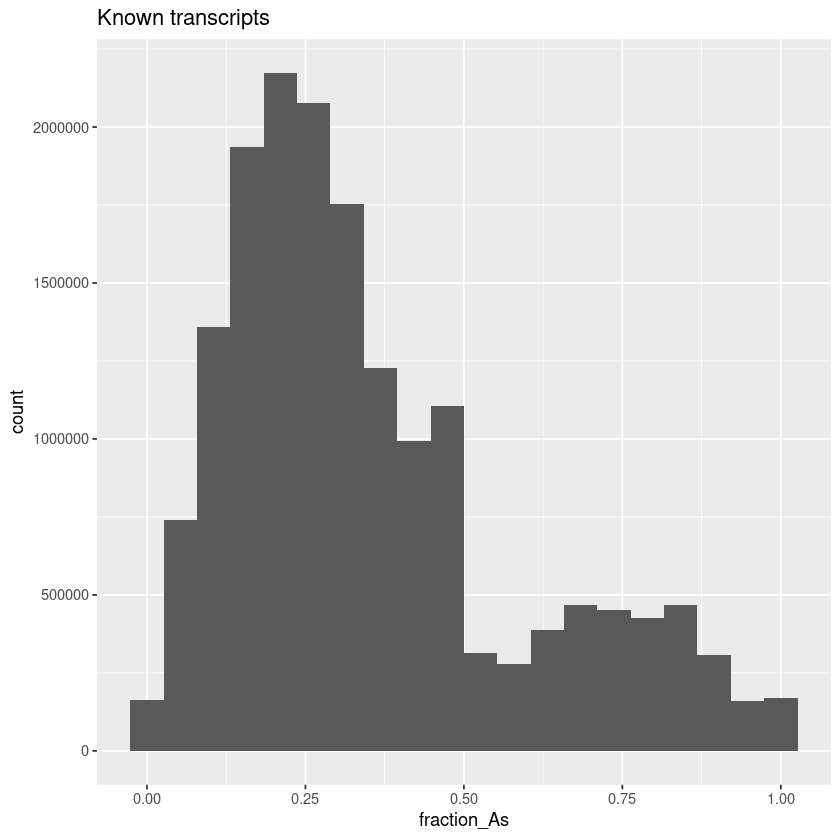

In [22]:
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    ggtitle("Known transcripts")

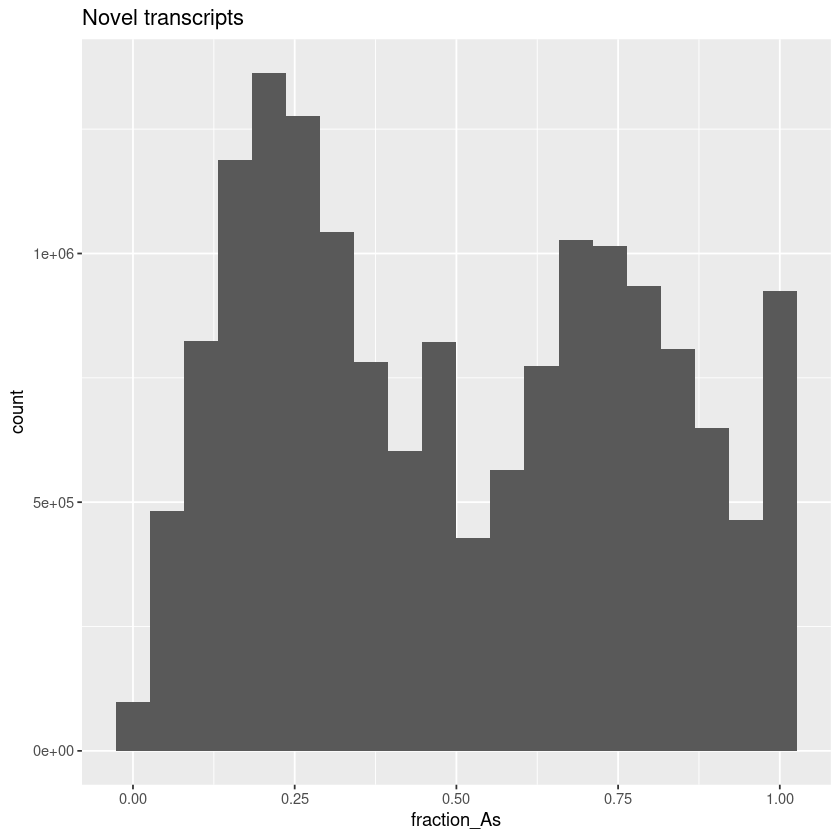

In [23]:
frac_As = talon_read_annot %>%
    filter(transcript_novelty != "Known") %>%
    select(read_name, fraction_As)
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    ggtitle("Novel transcripts")

In [18]:
ASHOK_READ_ANNOT = "/u/project/gandalm/ashokpat/PacBio/scIsoSeq/AllSMDataAnalysis/11282020_Batch1_Batch2/TALON/scIsoSeq_talon_read_annot.tsv"
ashok_read_annot = read_tsv(
    ASHOK_READ_ANNOT,
    na = c("None"),
    col_types = list(
        read_name = col_character(),
        dataset = col_factor(),
        genome_build = col_factor(),
        chrom = col_factor(),
        read_start = col_integer(),
        read_end = col_integer(),
        strand = col_factor(),
        n_exons = col_integer(),
        read_length = col_integer(),
        gene_ID = col_integer(),
        transcript_ID = col_integer(),
        annot_gene_id = col_character(),
        annot_transcript_id = col_character(),
        annot_gene_name = col_character(),
        annot_transcript_name = col_character(),
        gene_novelty = col_factor(),
        transcript_novelty = col_factor(),
        ISM_subtype = col_factor(include_na = F),
        fraction_As = col_double(),
        custom_label = col_character(),
        allelic_label = col_character(),
        start_support = col_character(),
        end_support = col_character()
    )
) %>%
    mutate(
        gene_novelty = fct_infreq(gene_novelty),
        transcript_novelty = fct_infreq(transcript_novelty),
        ISM_subtype = ISM_subtype %>%
            na_if("None") %>%
            fct_drop() %>%
            fct_relevel("Suffix", "Prefix", "Both")
    )
ashok_read_annot

read_name,dataset,genome_build,chrom,read_start,read_end,strand,n_exons,read_length,gene_ID,⋯,annot_gene_name,annot_transcript_name,gene_novelty,transcript_novelty,ISM_subtype,fraction_As,custom_label,allelic_label,start_support,end_support
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>
molecule/2931954,SC_SC,hg37,GL000197.1,19643,20625,+,1,983,62487,⋯,TALONG000062487,TALONT000229693,Intergenic,Intergenic,NA,0.50,NA,NA,NA,NA
molecule/7106815,SC_SC,hg37,GL000224.1,452,2834,+,1,2383,62488,⋯,TALONG000062488,TALONT000229694,Intergenic,Intergenic,NA,0.65,NA,NA,NA,NA
molecule/8701876,SC_SC,hg37,GL000224.1,892,4047,+,2,1124,62488,⋯,TALONG000062488,TALONT000229695,Intergenic,Genomic,NA,0.45,NA,NA,NA,NA
molecule/2015752,SC_SC,hg37,GL000224.1,2037,3440,+,1,1404,62488,⋯,TALONG000062488,TALONT000229694,Intergenic,Intergenic,NA,0.50,NA,NA,NA,NA
molecule/1446856,SC_SC,hg37,GL000224.1,2311,3981,+,1,1687,62488,⋯,TALONG000062488,TALONT000229694,Intergenic,Intergenic,NA,0.60,NA,NA,NA,NA
molecule/2823553,ExDp1_GTGTCCAGATGA,hg37,GL000224.1,2539,3549,+,1,1023,62488,⋯,TALONG000062488,TALONT000229694,Intergenic,Intergenic,NA,0.30,NA,NA,NA,NA
molecule/3677506,SC_SC,hg37,GL000224.1,3277,4022,+,1,758,62488,⋯,TALONG000062488,TALONT000229696,Intergenic,ISM,NA,0.45,NA,NA,NA,NA
molecule/9411417,SC_SC,hg37,GL000224.1,3553,4047,+,1,758,62488,⋯,TALONG000062488,TALONT000229696,Intergenic,ISM,NA,0.45,NA,NA,NA,NA
molecule/10905,ExDp1_AGACATAAACGC,hg37,GL000224.1,3368,9038,+,2,5338,62489,⋯,TALONG000062489,TALONT000229697,Intergenic,Intergenic,NA,0.55,NA,NA,NA,NA


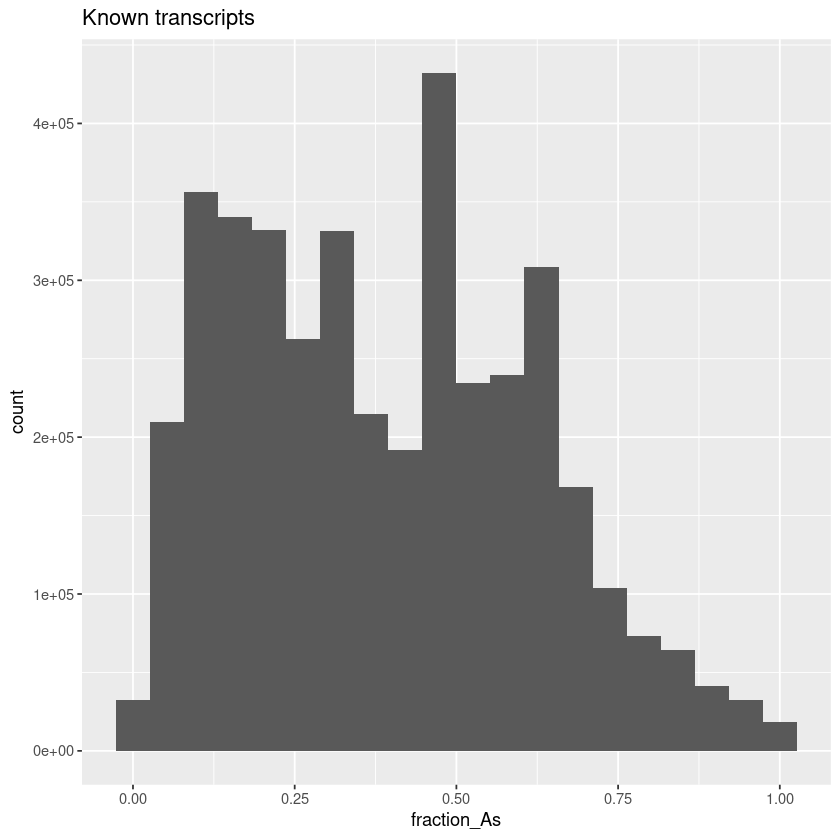

In [25]:
frac_As = ashok_read_annot %>%
    filter(transcript_novelty == "Known") %>%
    select(read_name, fraction_As)
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    ggtitle("Known transcripts")

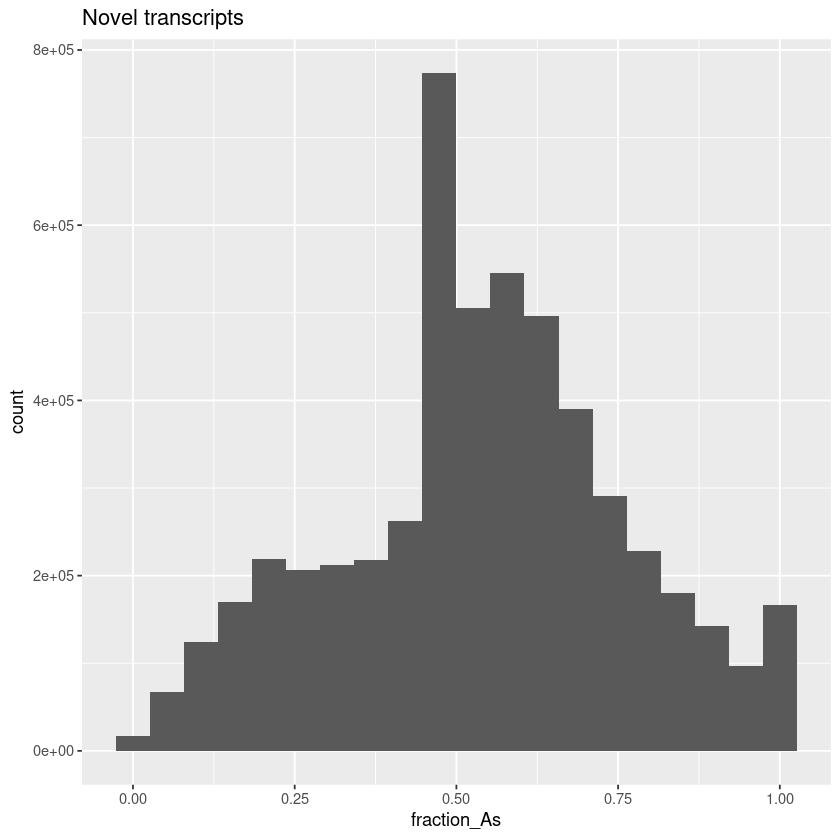

In [26]:
frac_As = ashok_read_annot %>%
    filter(transcript_novelty != "Known") %>%
    select(read_name, fraction_As)
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    ggtitle("Novel transcripts")

In [16]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 300)

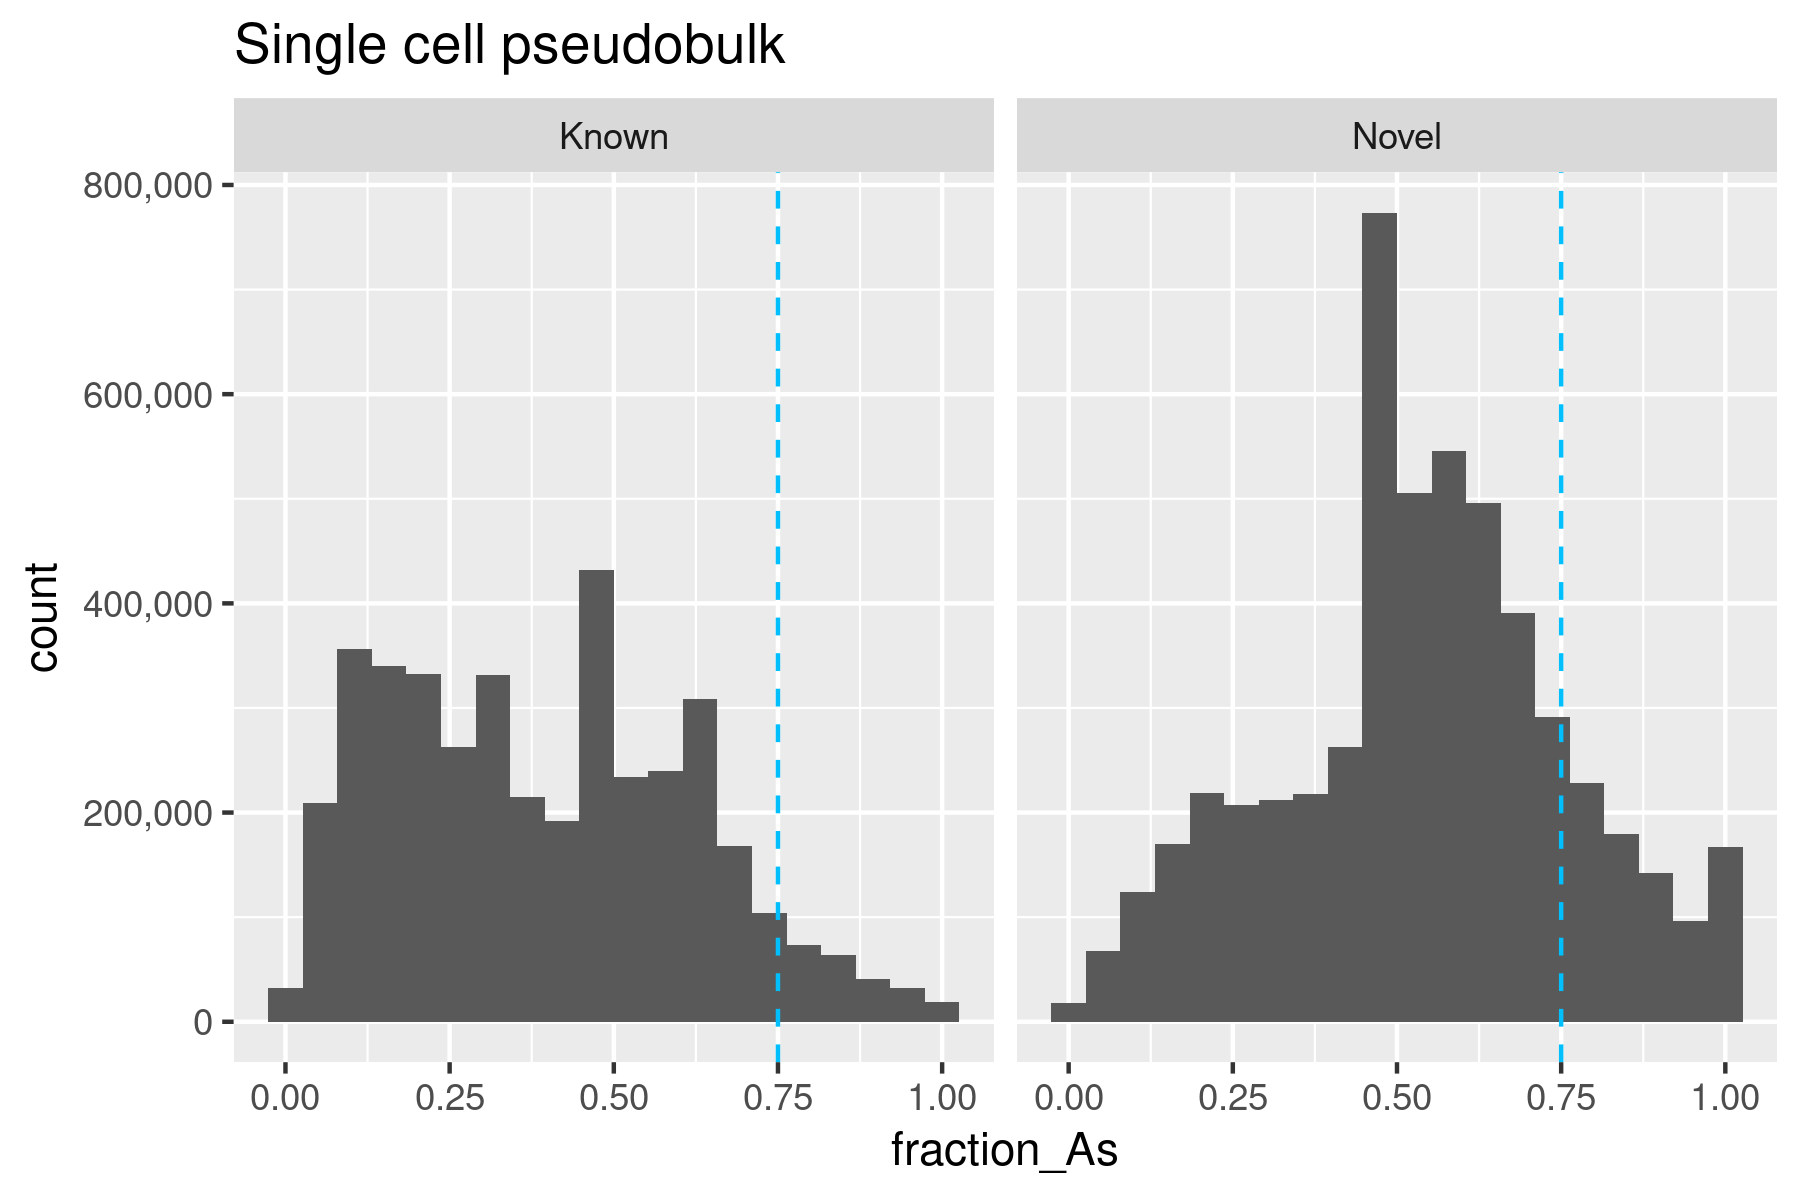

In [36]:
frac_As = ashok_read_annot %>%
    select(read_name, fraction_As, transcript_novelty) %>%
    mutate(transcript_novelty = fct_other(transcript_novelty, keep = "Known", other_level = "Novel"))
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    scale_y_continuous(labels = scales::comma) +
    geom_vline(xintercept = 0.75, linetype = 2, color = "deepskyblue") +
    facet_wrap(vars(transcript_novelty)) +
    ggtitle("Single cell pseudobulk")

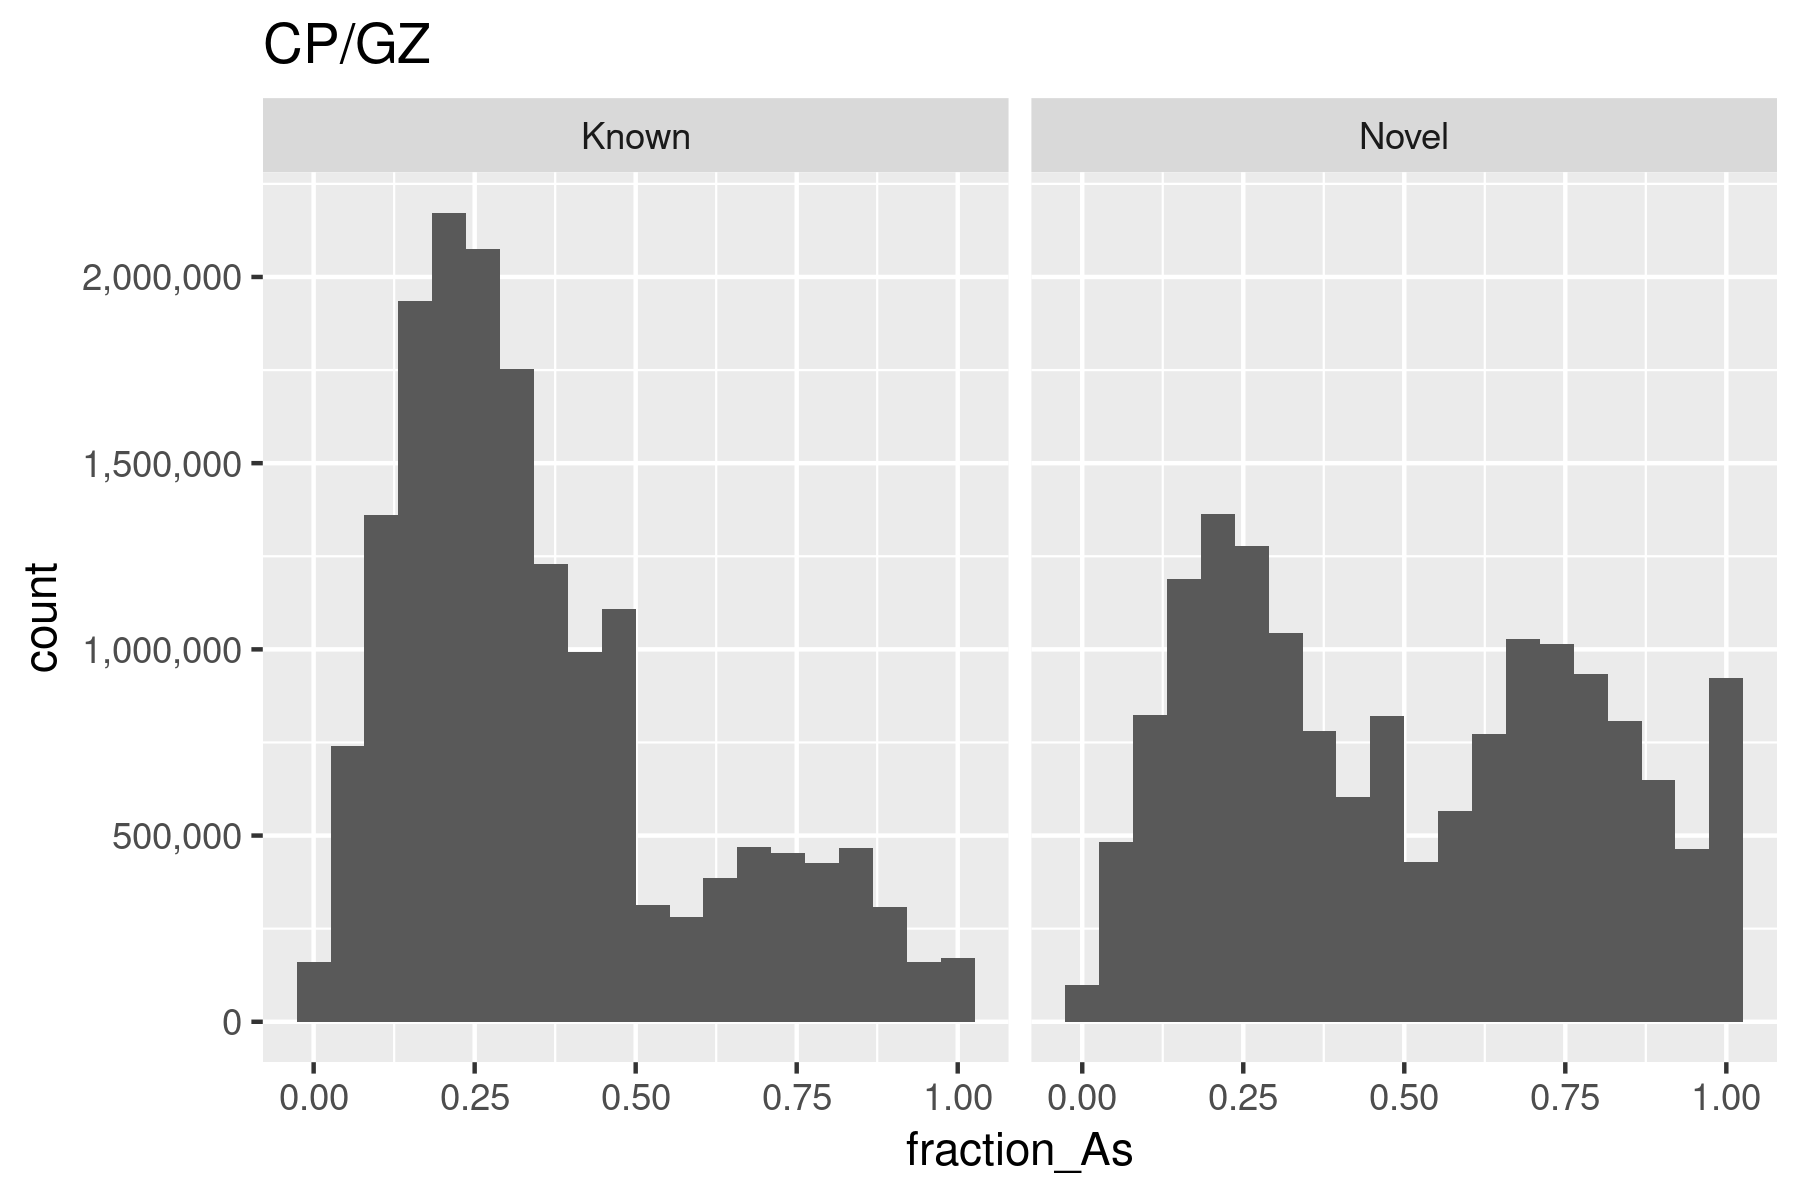

In [35]:
frac_As = talon_read_annot %>%
    select(read_name, fraction_As, transcript_novelty) %>%
    mutate(transcript_novelty = fct_other(transcript_novelty, keep = "Known", other_level = "Novel"))
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    scale_y_continuous(labels = scales::comma) +
    facet_wrap(vars(transcript_novelty)) +
    ggtitle("CP/GZ")

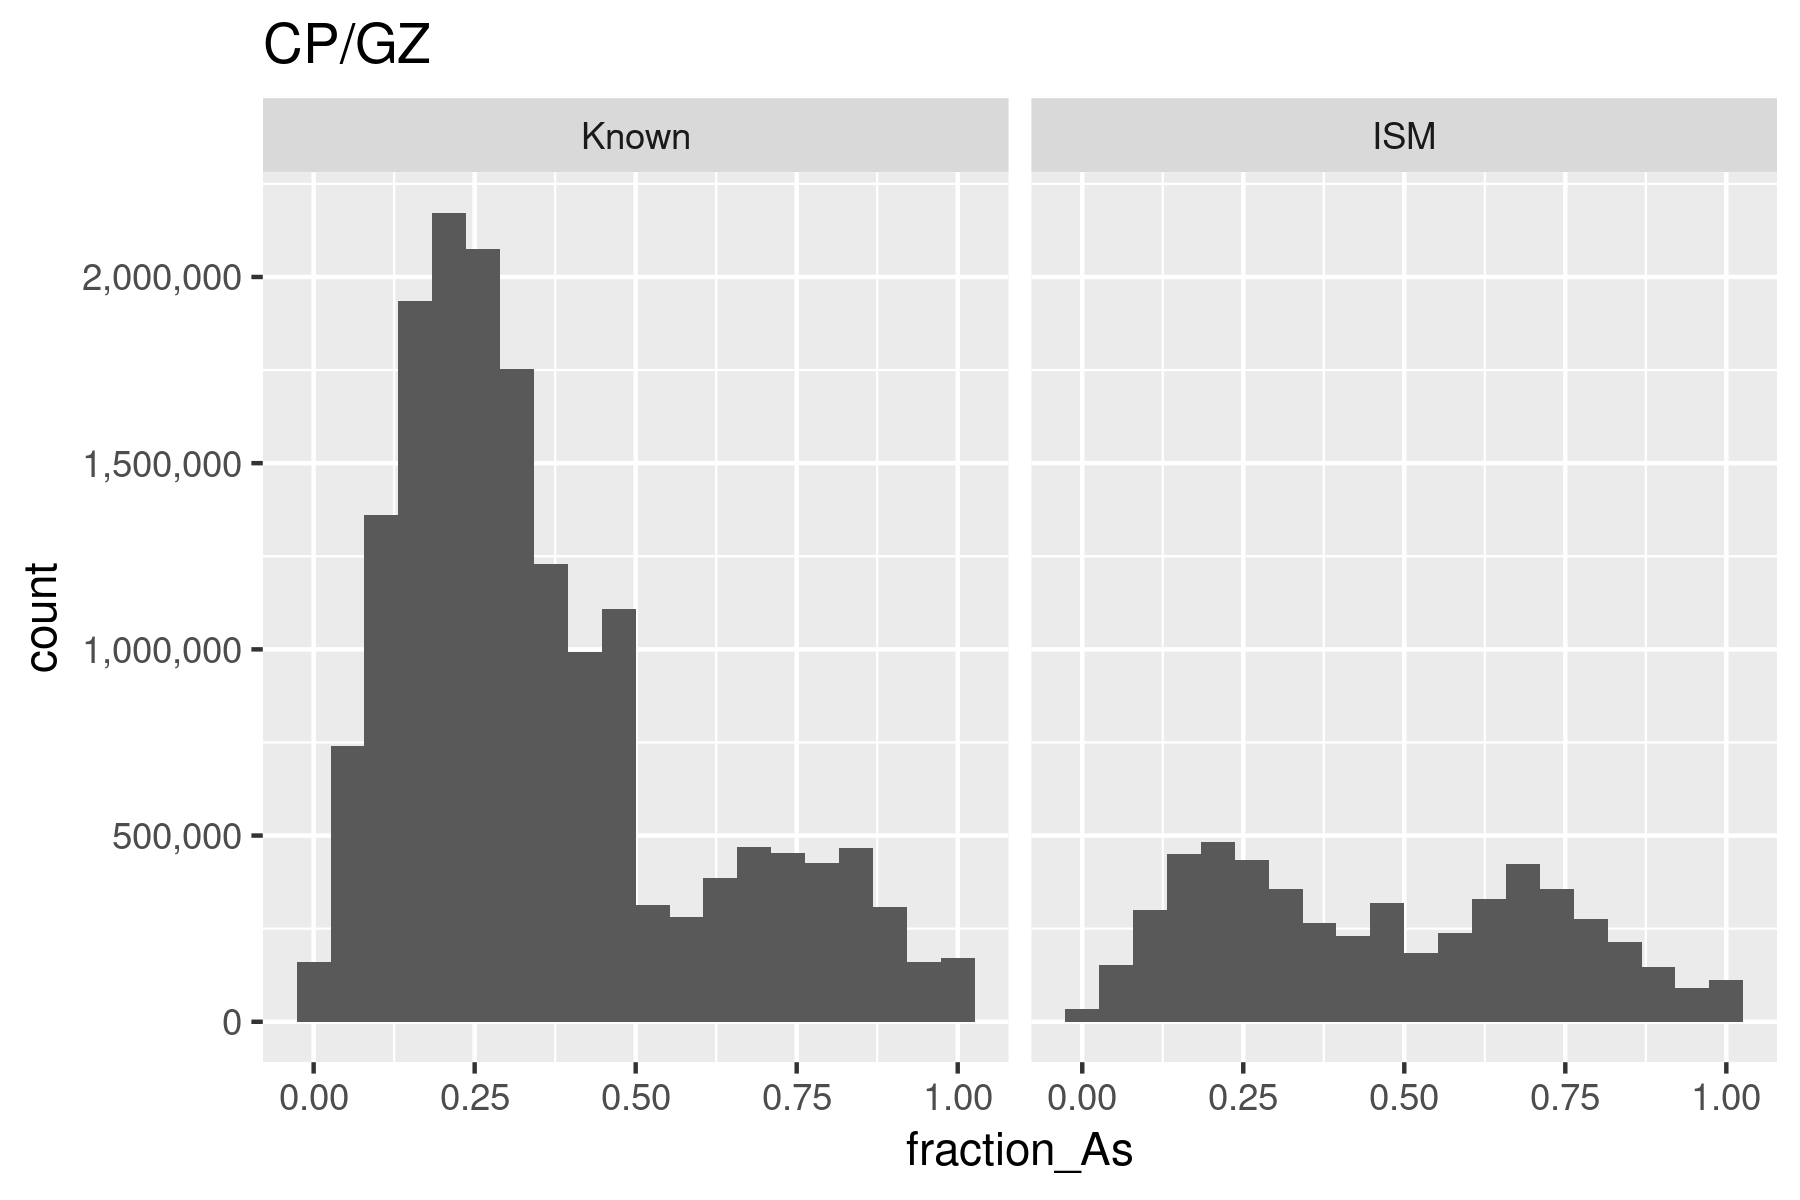

In [17]:
frac_As = talon_read_annot %>%
    select(read_name, fraction_As, transcript_novelty) %>%
    filter(transcript_novelty %in% c("Known", "ISM"))
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    scale_y_continuous(labels = scales::comma) +
    facet_wrap(vars(transcript_novelty)) +
    ggtitle("CP/GZ")

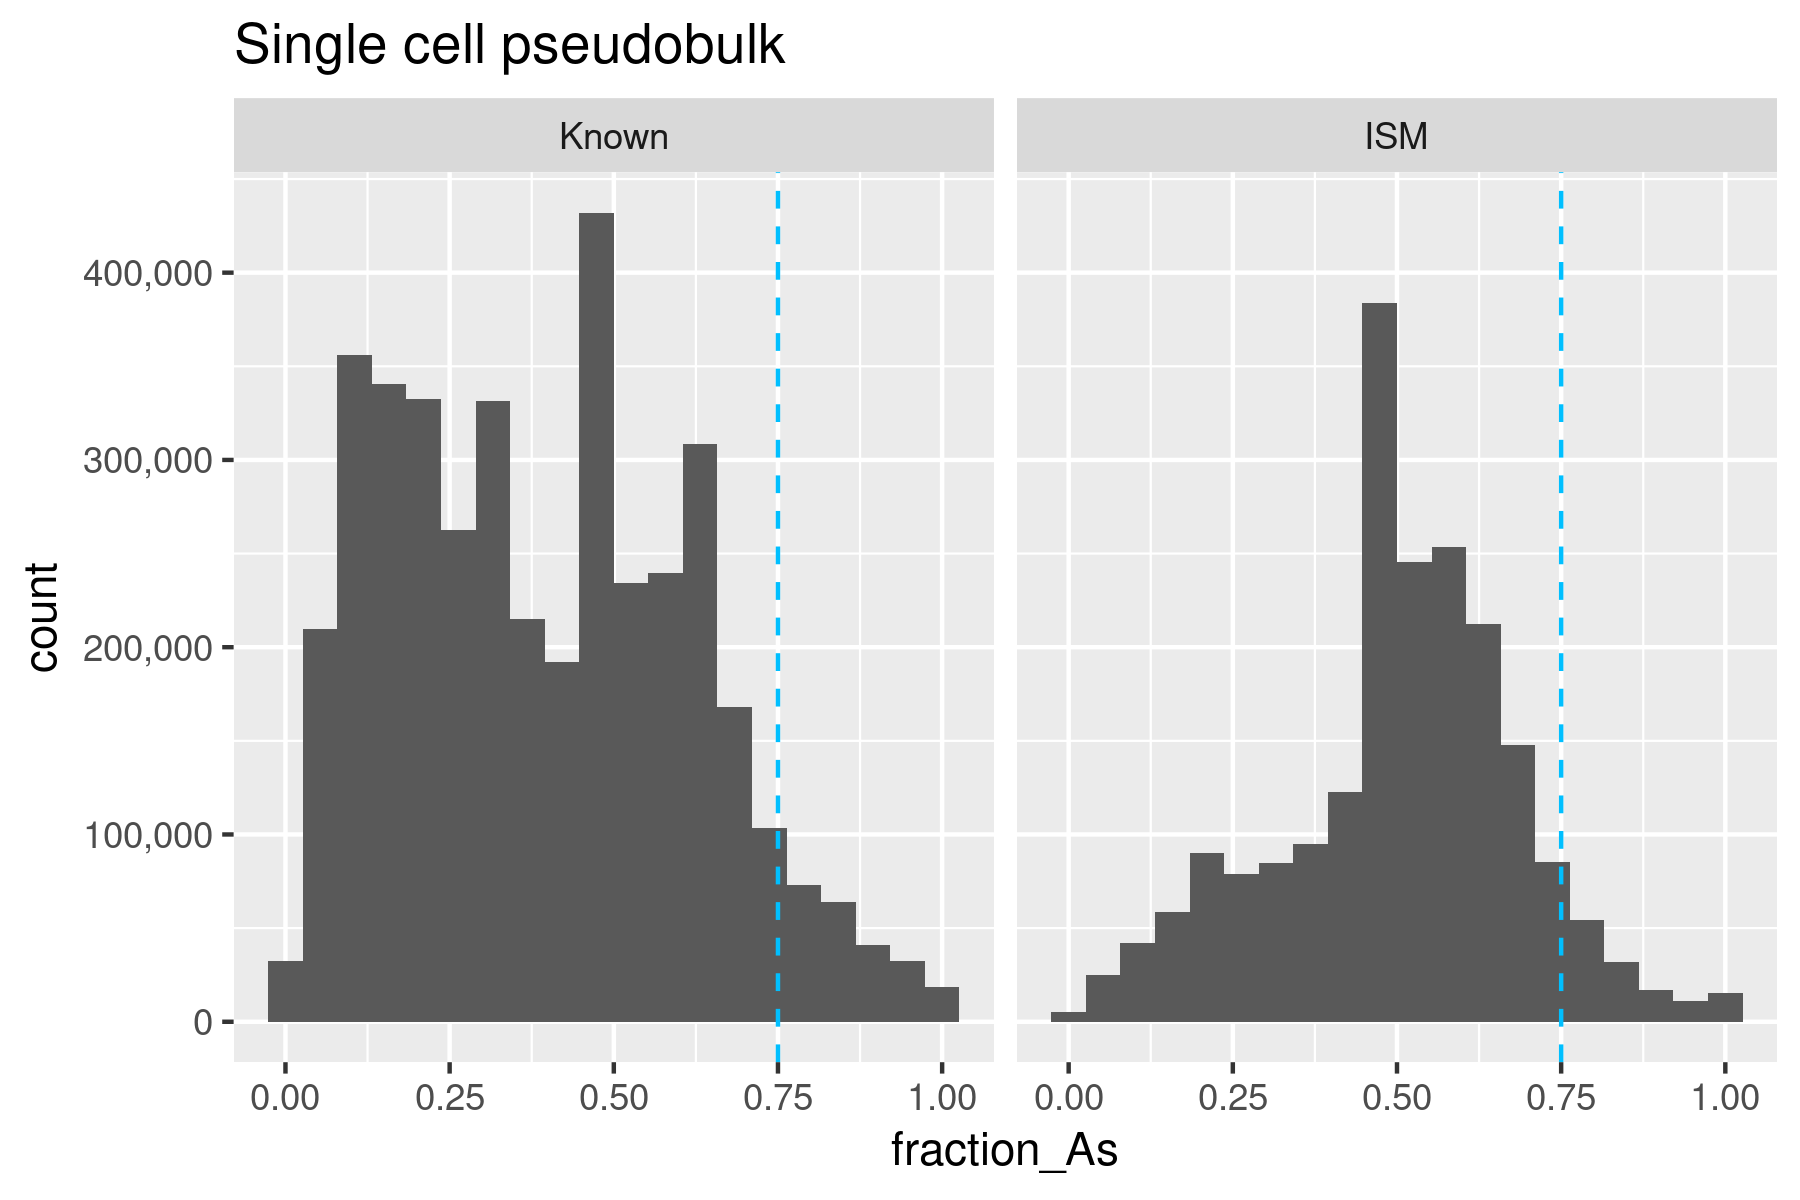

In [19]:
frac_As = ashok_read_annot %>%
    select(read_name, fraction_As, transcript_novelty) %>%
    filter(transcript_novelty %in% c("Known", "ISM"))
ggplot(frac_As, aes(x = fraction_As)) +
    geom_histogram(bins = 20) +
    scale_y_continuous(labels = scales::comma) +
    geom_vline(xintercept = 0.75, linetype = 2, color = "deepskyblue") +
    facet_wrap(vars(transcript_novelty)) +
    ggtitle("Single cell pseudobulk")

---

In [11]:
talon_read_annot %>%
    group_by(gene_ID, transcript_ID) %>%
    summarize() #%>%
#    write_csv(paste0("talon_whitelist_0.75_min_7_recovery.txt"), col_names = F)

`summarise()` has grouped output by 'gene_ID'. You can override using the `.groups` argument.


gene_ID,transcript_ID
<int>,<int>
1,233107
2,233109
2,233119
2,233121
2,233123
2,233124
2,233126
2,233127
2,233128


In [14]:
talon_read_annot %>%
    group_by(gene_ID, transcript_ID, annot_gene_id, annot_transcript_id) %>%
    summarize() %>%
    rename(gene_id = "annot_gene_id", transcript_id = "annot_transcript_id", talon_gene_id = "gene_ID", talon_transcript_id = "transcript_ID") %>%
    write_tsv("results/talon/talon.db.ids.txt.gz")

`summarise()` has grouped output by 'gene_ID', 'transcript_ID', 'annot_gene_id'. You can override using the `.groups` argument.
